# Verify the performance of detecting structures with low quality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from sklearn.metrics import roc_curve, auc

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)

In [3]:
df = pd.read_csv(score_dir / 'all_score.csv.gz', index_col=0)
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
112595       model_5_seed_1_rec_7_ens_8    0.977   0.965   0.865        0.888   
112596       model_5_seed_1_rec_8_ens_1    0.980   0.964   0.861        0.894   
112597       model_5_seed_1_rec_8_ens_8    0.977   0.965   0.866        0.887   
112598       model_5_seed_1_rec_9_ens_1    0.980   0.964   0.861        0.894   
112599       model_5_seed_1_rec_9_ens_8    0.977   0.966   0.862        0.889   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
0           0.901  0.955     0.900      0.032  model_1_ptm  ... 123028.594   
1           0.901  0.956     0.901      0.019  model_1_ptm  ... 123495.156   
2           0.901  0.944     0.895     20.749  model_1_ptm  ... 120974.703   
3           0.901  0.947     0.896     20.749  model_1_ptm  ... 120961.469   
4           0.903  0.948     0.897      0.172  model_1_ptm  ... 121001.195   
...           ...    ...       ...        ...          ...  ...        ...   
112595      0.885  0.920       NaN      0.045      model_5  ... 101688.102   
112596      0.890  0.922       NaN      0.032      model_5  ... 103715.461   
112597      0.884  0.920       NaN      0.089      model_5  ... 102201.047   
112598      0.890  0.922       NaN      0.031      model_5  ... 103479.828   
112599      0.885  0.921       NaN      0.043      model_5  ... 101200.562   

        DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
0            0.994            0.891  0.973   0.821        0.806       0.967   
1            0.995            0.955  0.972   0.823        0.805       0.966   
2            0.990            0.894  0.977   0.822        0.803       0.961   
3            0.993            0.878  0.977   0.828        0.805       0.966   
4            0.989            0.866  0.973   0.816        0.793       0.963   
...            ...              ...    ...     ...          ...         ...   
112595       0.882            0.897  0.496   0.474        0.514       0.852   
112596       0.878            0.835  0.483   0.439        0.443       0.838   
112597       0.886            0.899  0.489   0.457        0.478       0.844   
112598       0.890            0.853  0.493   0.468        0.473       0.849   
112599       0.887            0.898  0.481   0.458        0.466       0.843   

       ProQ3D  SBROD VoroCNN  
0       0.895  1.505   0.686  
1       0.894  1.507   0.687  
2       0.891  1.515   0.687  
3       0.892  1.514   0.684  
4       0.888  1.513   0.679  
...       ...    ...     ...  
112595  0.782  1.369   0.631  
112596  0.775  1.370   0.630  
112597  0.779  1.367   0.630  
112598  0.784  1.367   0.632  
112599  0.780  1.365   0.632  

[112600 rows x 37 columns]

## Case 1: Negative examples are structures with the label value is less than the threshold value

In [4]:
# Against gdtts
mqa_methods = ['ProQ3D', 'VoroCNN', 'P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert']
methods = mqa_methods + ['pLDDT', 'pTMscore']

In [5]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        df[l] = df[label] > threshold
        counts.append(df[l].value_counts())
pd.concat(counts, axis=1).T.fillna(0).astype(int)

True   False
GDT_TS_0.5     111705    895
GDT_TS_0.6     111175   1425
GDT_TS_0.7     109557   3043
GDT_TS_0.8     105035   7565
GDT_HA_0.5     110579   2021
GDT_HA_0.6     108284   4316
GDT_HA_0.7      96137  16463
GDT_HA_0.8      73661  38939
TMscore_0.5    111726    874
TMscore_0.6    111615    985
TMscore_0.7    110680   1920
TMscore_0.8    107263   5337
Mean_LDDT_0.5  101372  11228
Mean_LDDT_0.6  101325  11275
Mean_LDDT_0.7   99670  12930
Mean_LDDT_0.8   90913  21687

In [6]:
label = 'GDT_TS'
threshold = 0.7
l = f'{label}_{threshold}'
df[l]

0         True
1         True
2         True
3         True
4         True
          ... 
112595    True
112596    True
112597    True
112598    True
112599    True
Name: GDT_TS_0.7, Length: 112600, dtype: bool

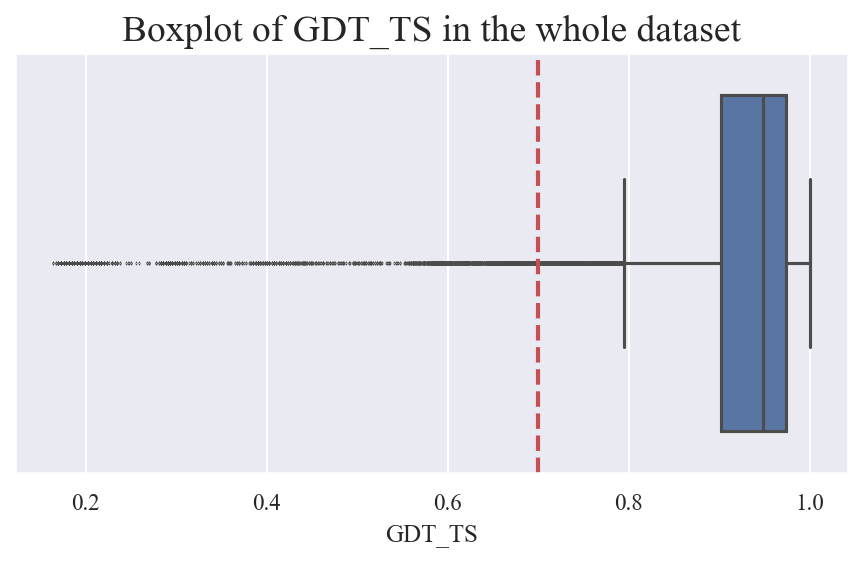

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='GDT_TS', fliersize=0.1)
plt.title('Boxplot of GDT_TS in the whole dataset', fontsize=18)
plt.axvline(x=0.7, color='r', linestyle='--', linewidth=2)
plt.tight_layout()

In [8]:
from sklearn.metrics import roc_curve, auc

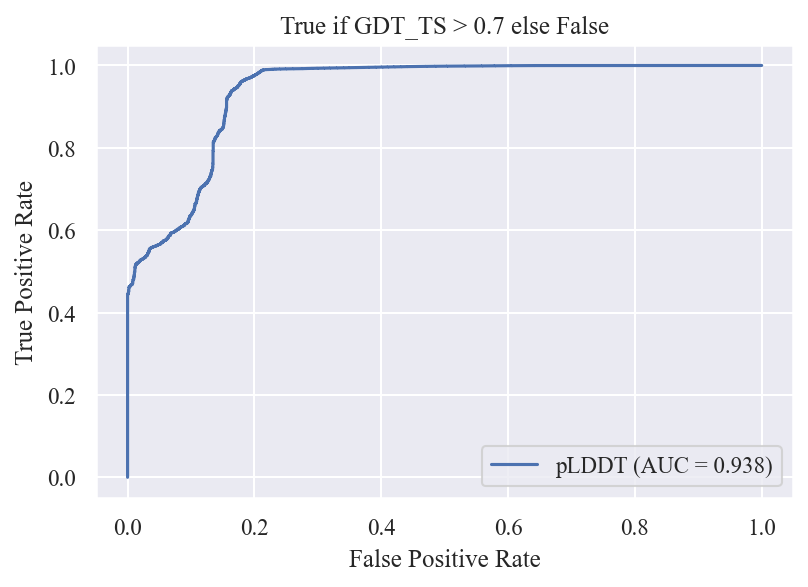

In [9]:
label = 'GDT_TS'
threshold = 0.7
l = f'{label}_{threshold}'
x = df[l]
score = 'pLDDT'
y = df[score]
fpr, tpr, thresholds = roc_curve(x, y)
a= auc(fpr, tpr)
plt.title(f'True if {label} > {threshold} else False')
plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112600 entries, 0 to 112599
Data columns (total 53 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Model                                112600 non-null  object 
 1   TMscore                              112600 non-null  float64
 2   GDT_TS                               112600 non-null  float64
 3   GDT_HA                               112600 non-null  float64
 4   Global_LDDT                          102200 non-null  float64
 5   Mean_LDDT                            102200 non-null  float64
 6   pLDDT                                112600 non-null  float64
 7   pTMscore                             56300 non-null   float64
 8   Tolerance                            112600 non-null  float64
 9   ModelName                            112600 non-null  object 
 10  Seed                                 112600 non-null  int64  
 11  Recycle      

In [11]:
methods

['ProQ3D',
 'VoroCNN',
 'P3CMQA',
 'DeepAccNet',
 'DeepAccNet-Bert',
 'pLDDT',
 'pTMscore']

In [12]:
df['pTMscore'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
112595     True
112596     True
112597     True
112598     True
112599     True
Name: pTMscore, Length: 112600, dtype: bool

pTMscore


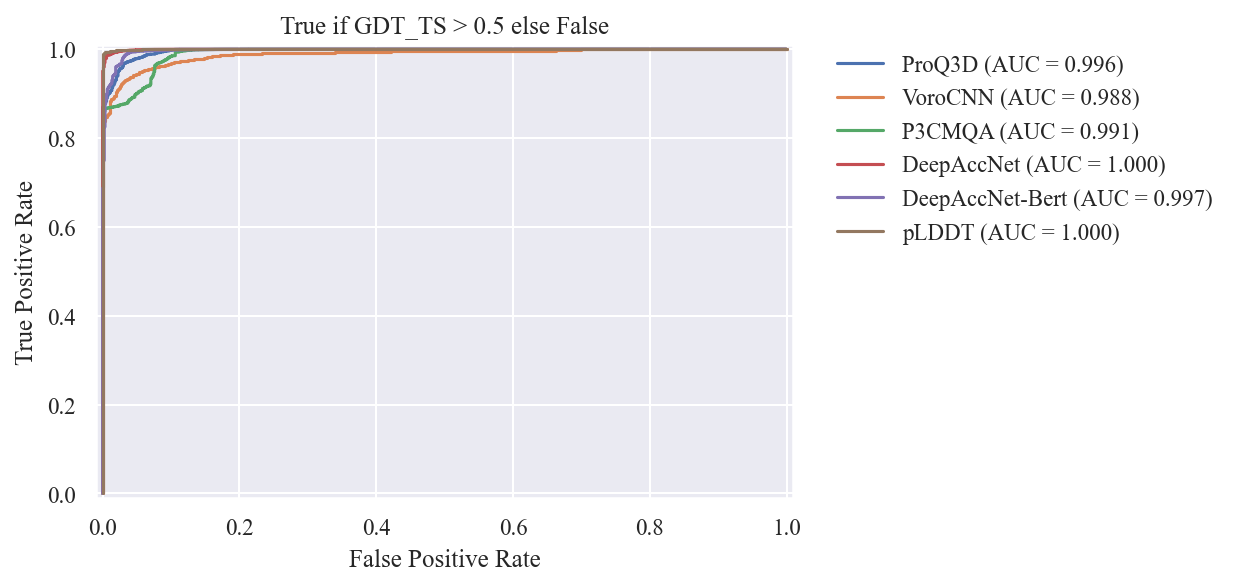

<Figure size 750x600 with 0 Axes>

pTMscore


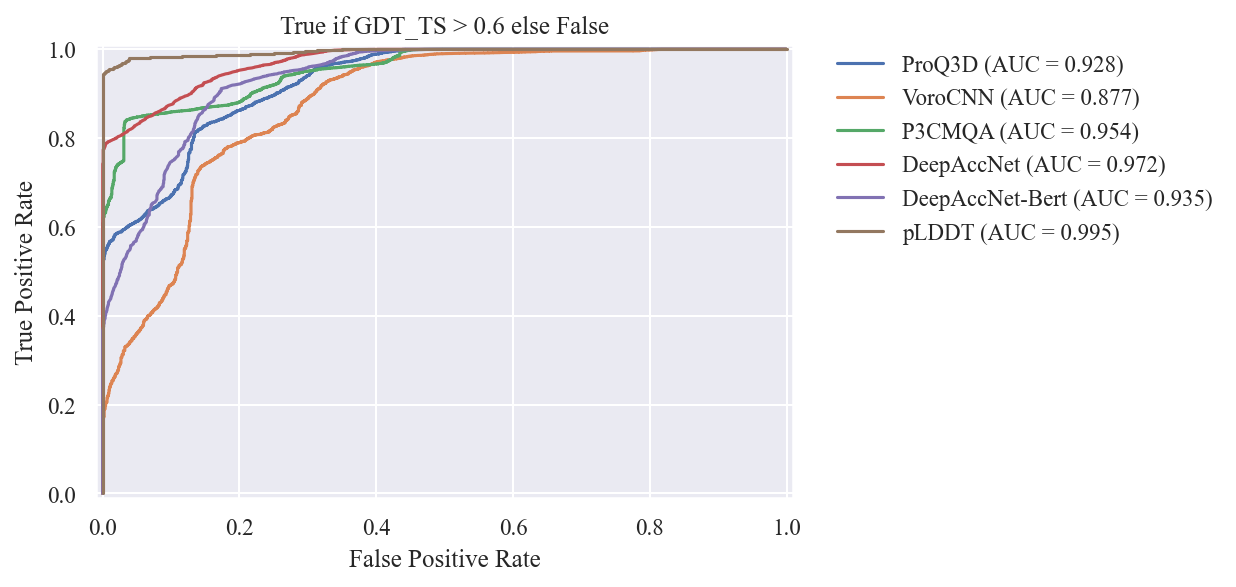

<Figure size 750x600 with 0 Axes>

pTMscore


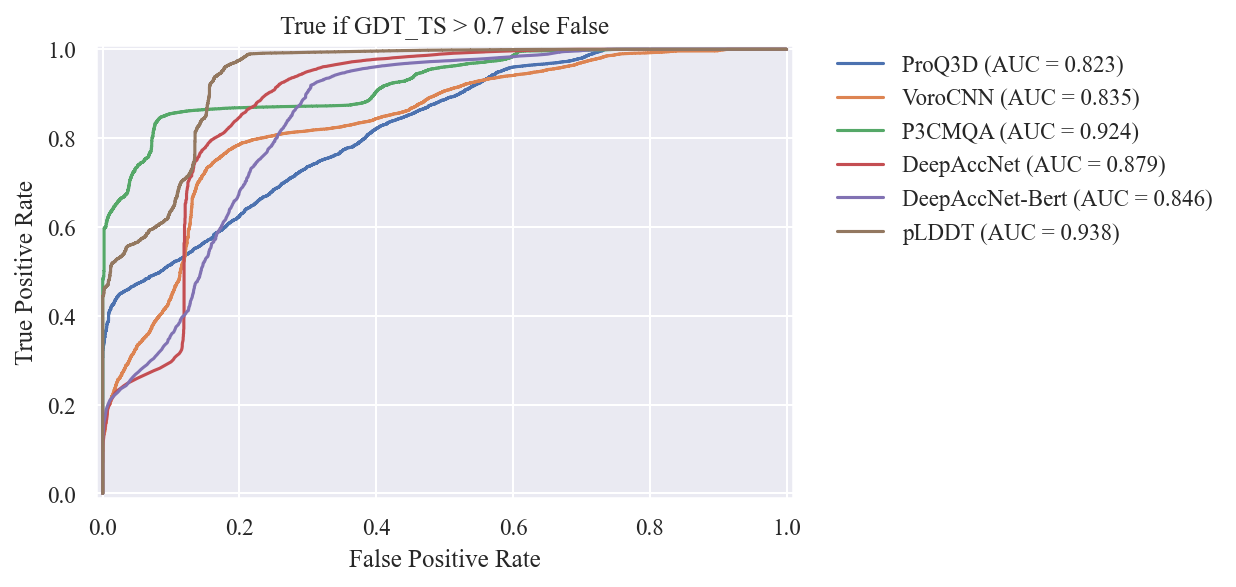

<Figure size 750x600 with 0 Axes>

pTMscore


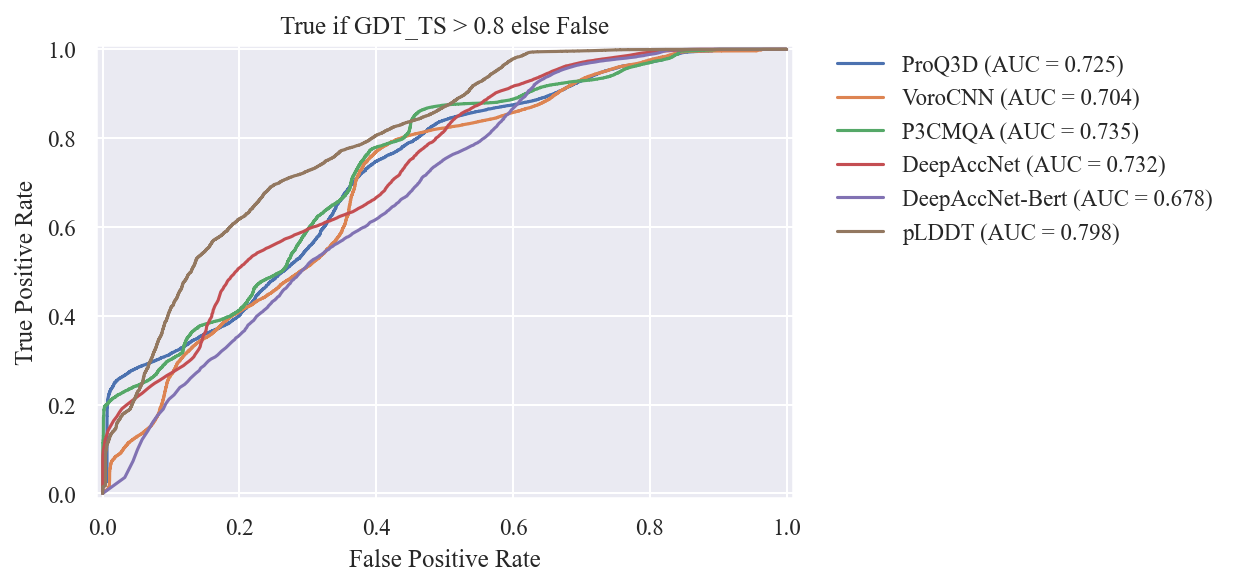

<Figure size 750x600 with 0 Axes>

pTMscore


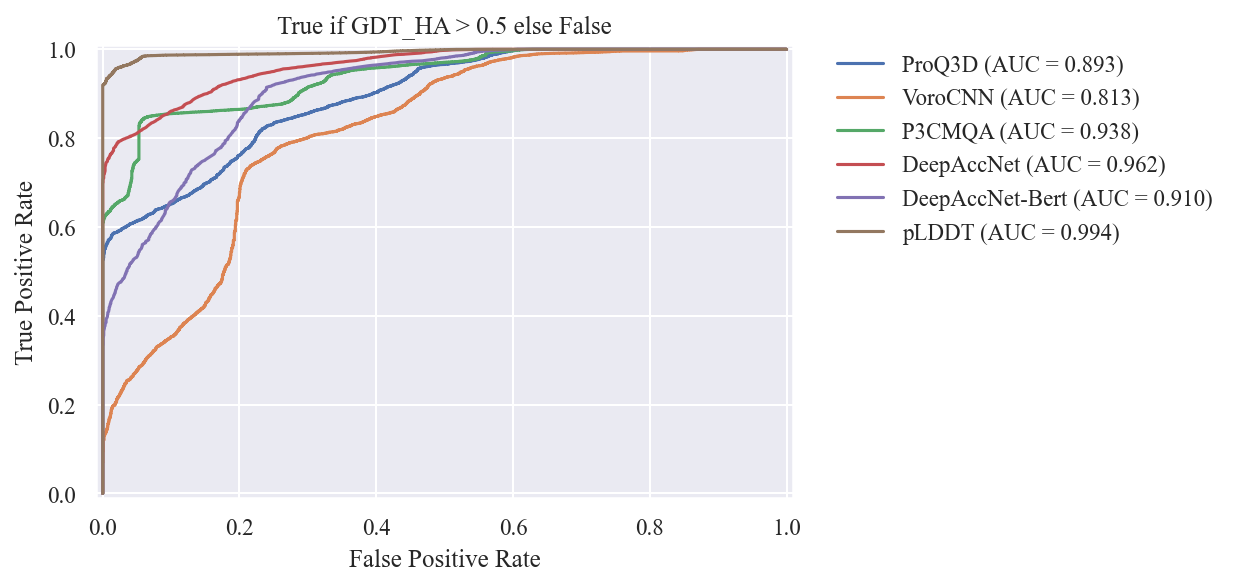

<Figure size 750x600 with 0 Axes>

pTMscore


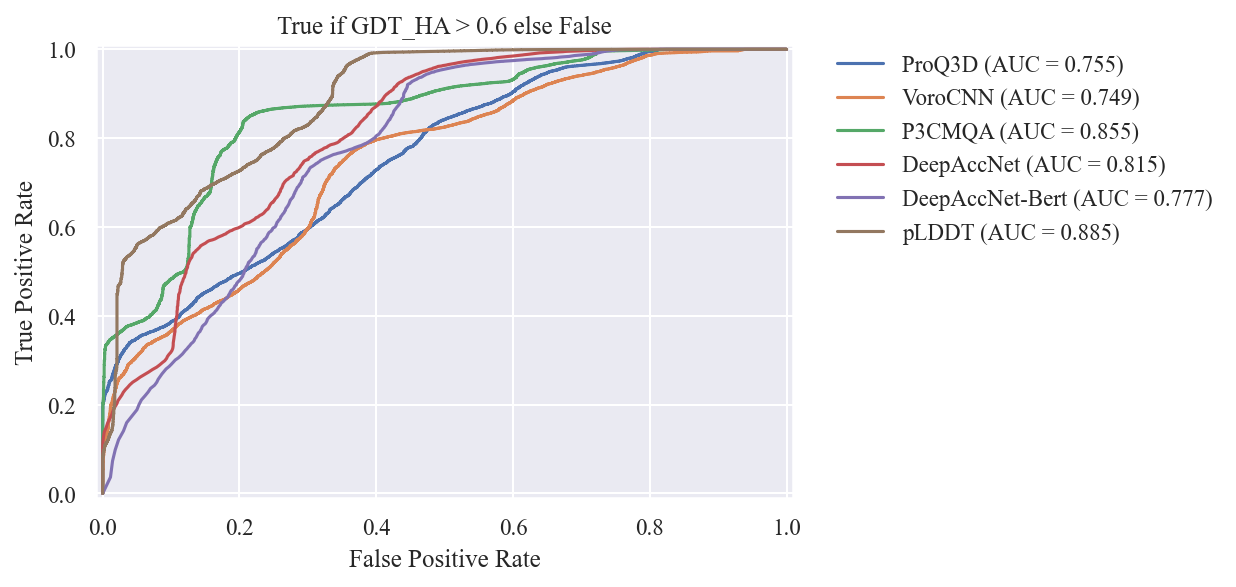

<Figure size 750x600 with 0 Axes>

pTMscore


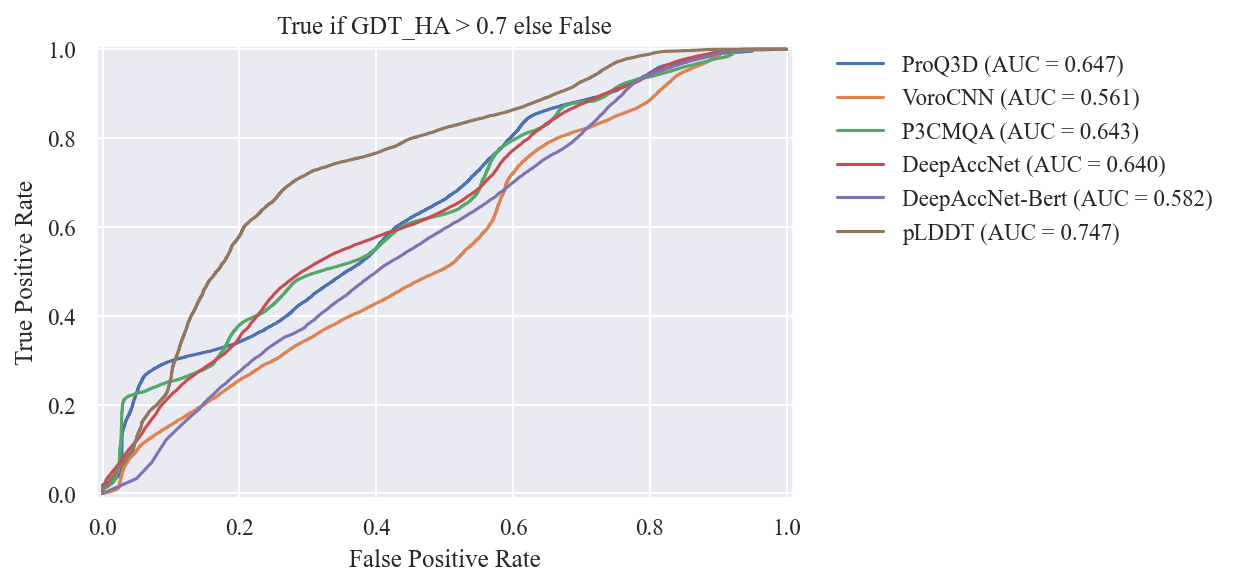

<Figure size 750x600 with 0 Axes>

pTMscore


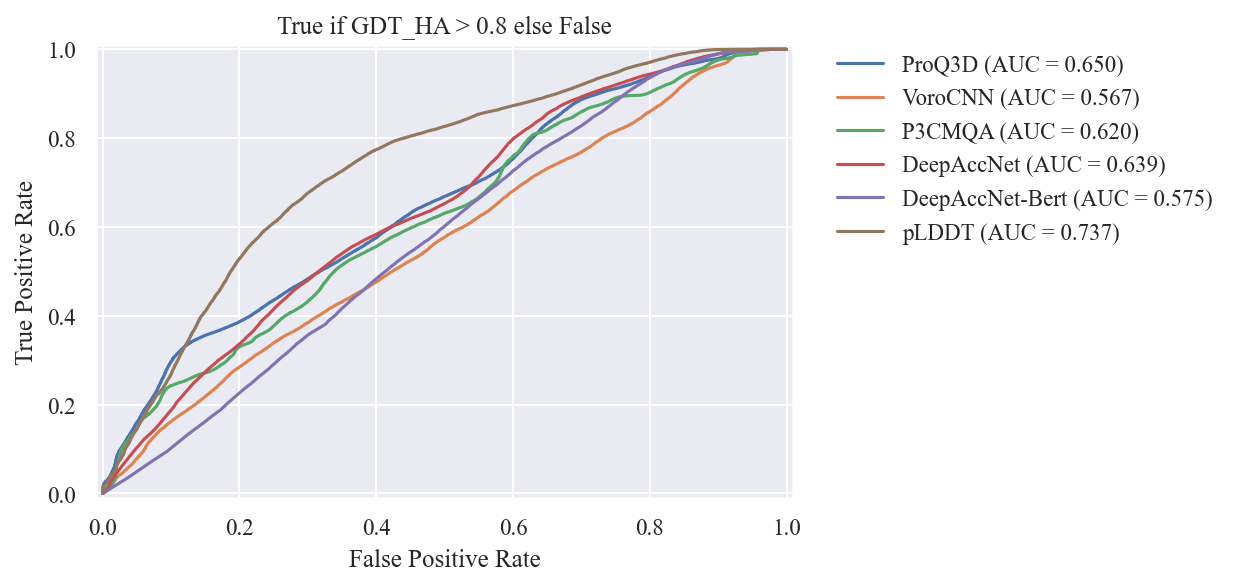

<Figure size 750x600 with 0 Axes>

pTMscore


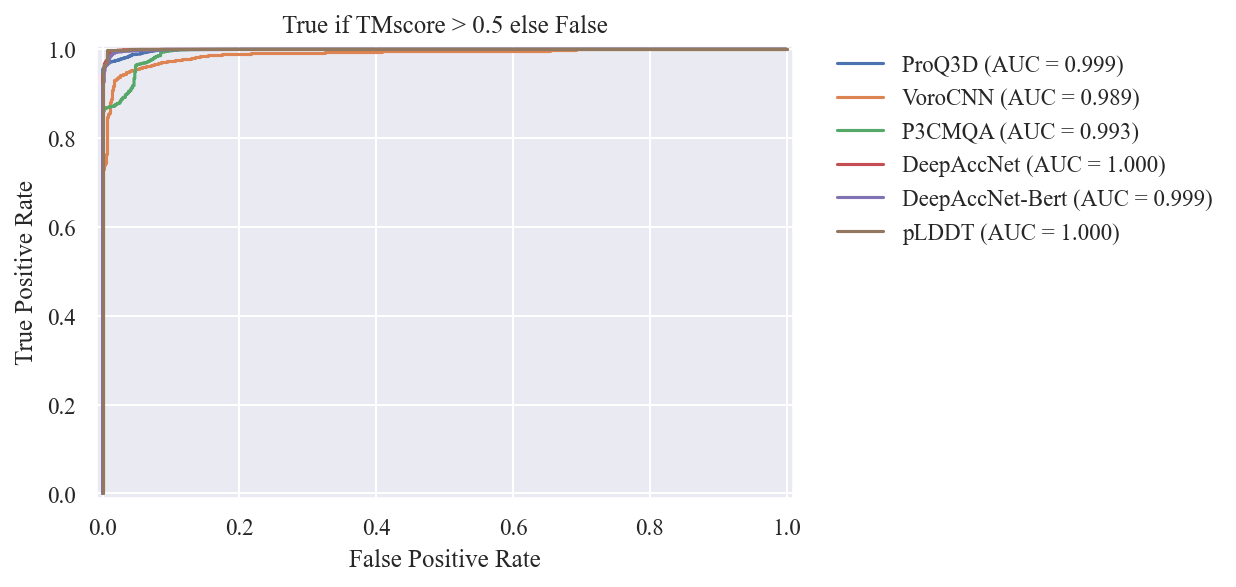

<Figure size 750x600 with 0 Axes>

pTMscore


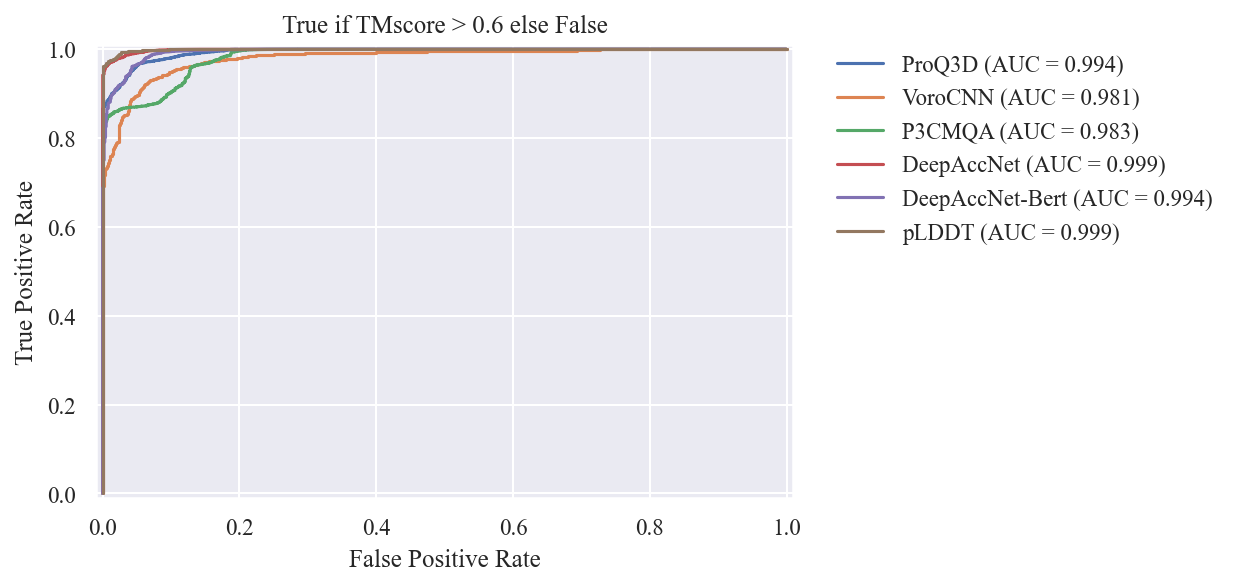

<Figure size 750x600 with 0 Axes>

pTMscore


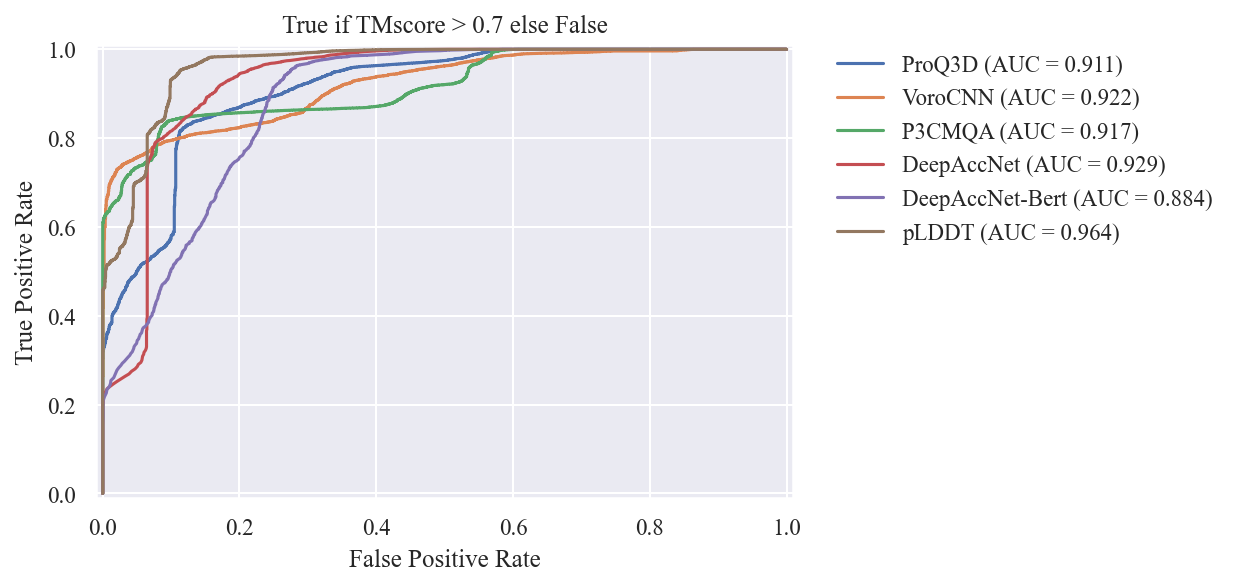

<Figure size 750x600 with 0 Axes>

pTMscore


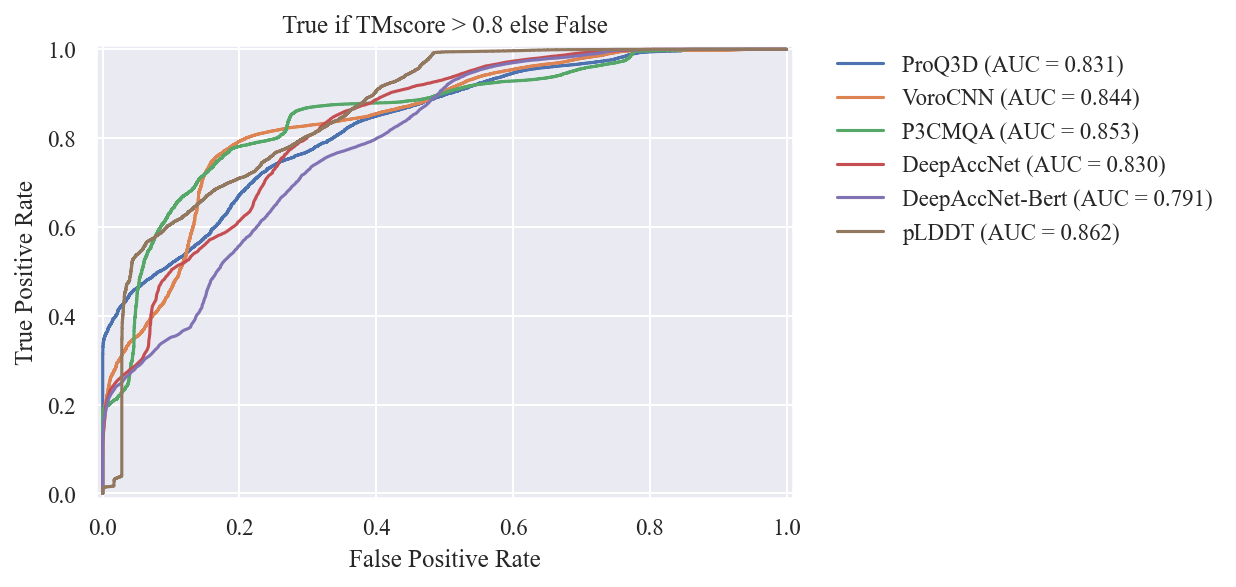

<Figure size 750x600 with 0 Axes>

pTMscore


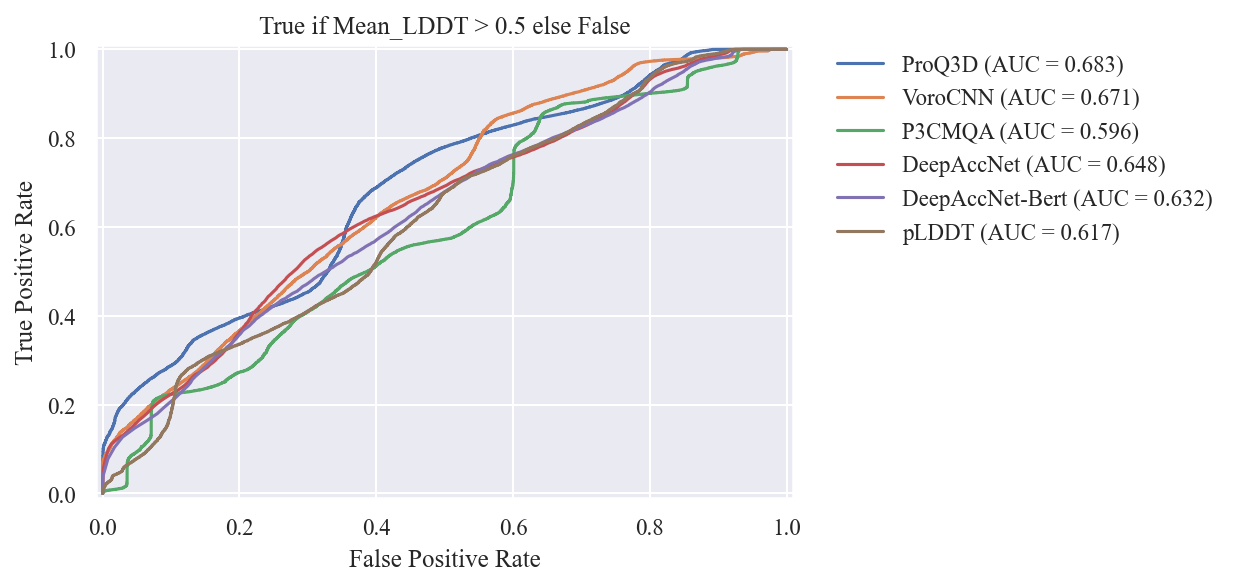

<Figure size 750x600 with 0 Axes>

pTMscore


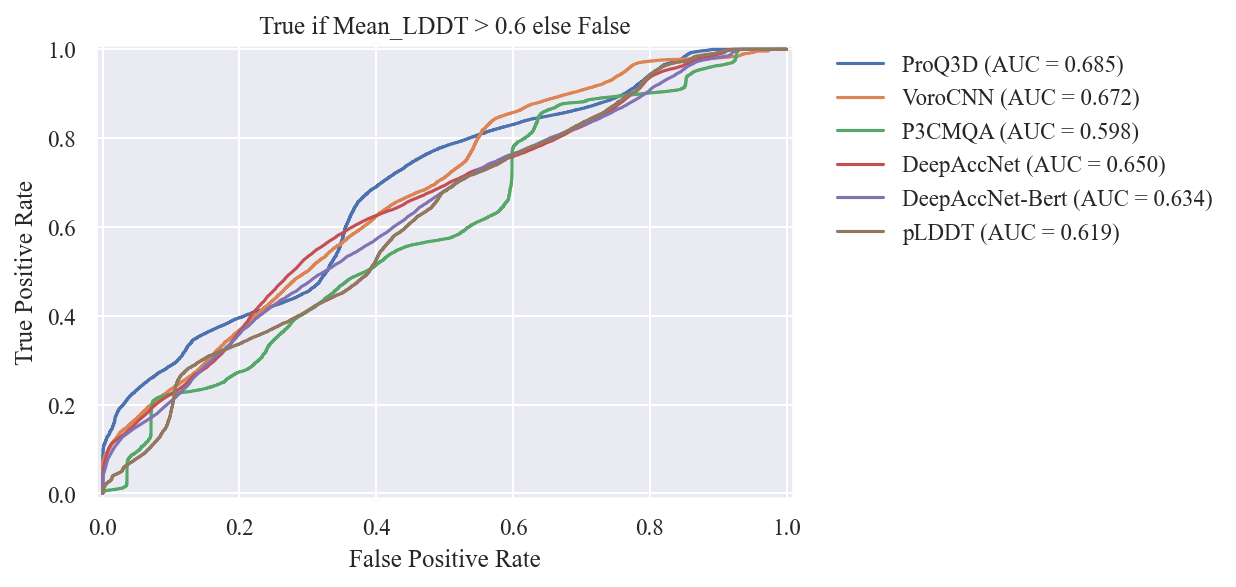

<Figure size 750x600 with 0 Axes>

pTMscore


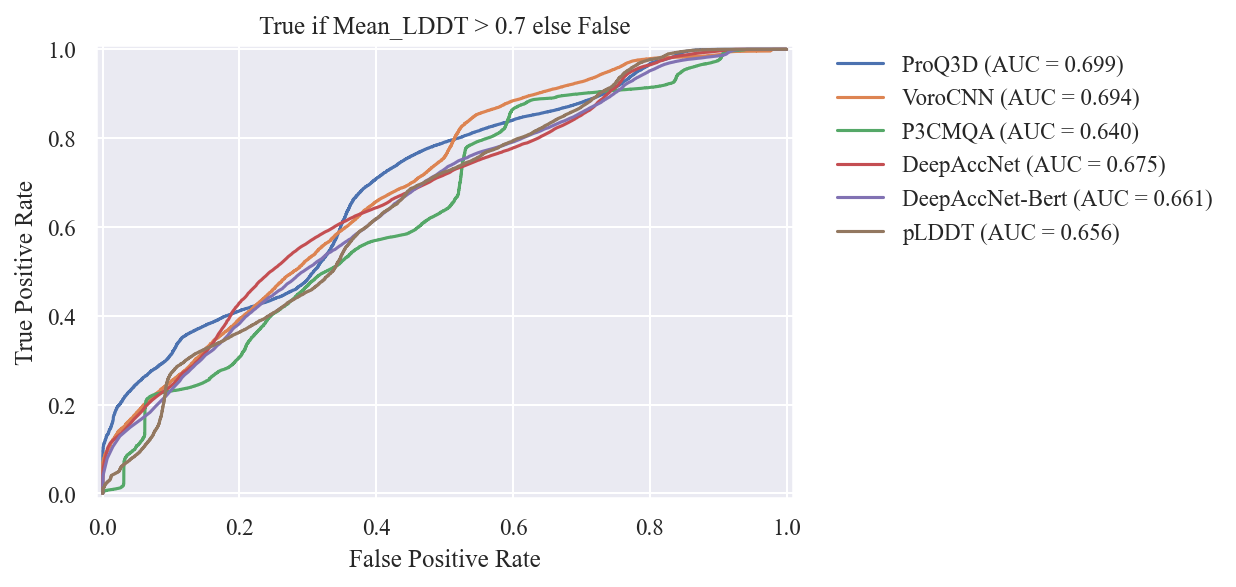

<Figure size 750x600 with 0 Axes>

pTMscore


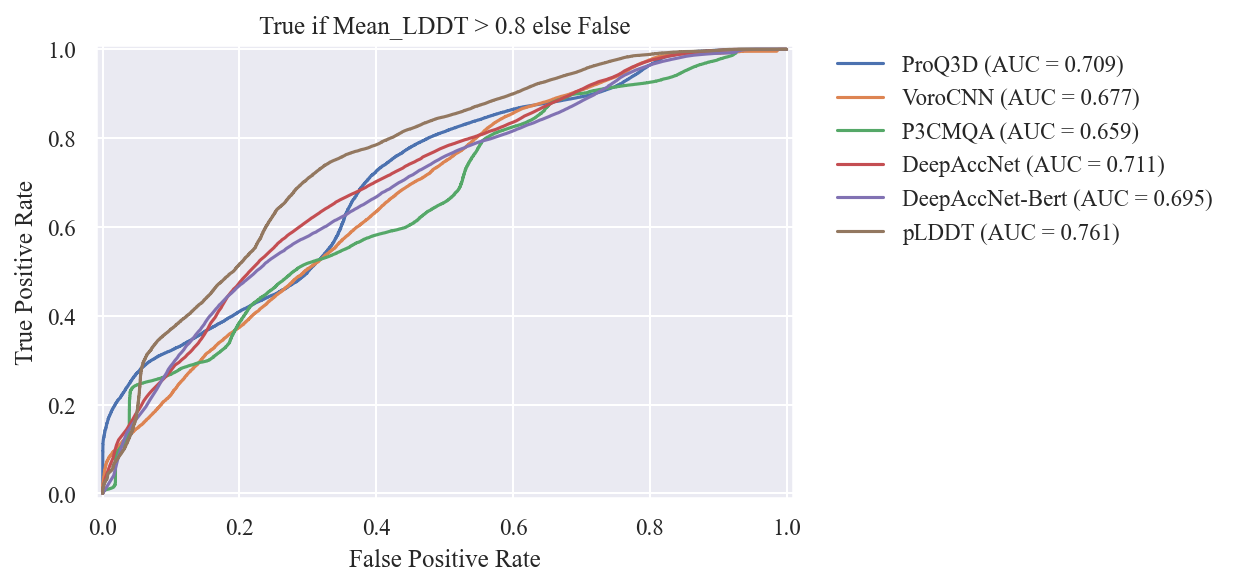

<Figure size 750x600 with 0 Axes>

In [13]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        x = df[l]
        for score in methods:
            y = df[score]
            if y.isna().any():
                print(score)
                continue
            fpr, tpr, thres = roc_curve(x, y)
            a= auc(fpr, tpr)
            plt.title(f'True if {label} > {threshold} else False')
            plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
            plt.legend()
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, facecolor='white', edgecolor='white')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.figure(figsize=(5, 4))
        plt.tight_layout()
        plt.show()

True     55871
False      429
Name: GDT_TS_0.5, dtype: int64


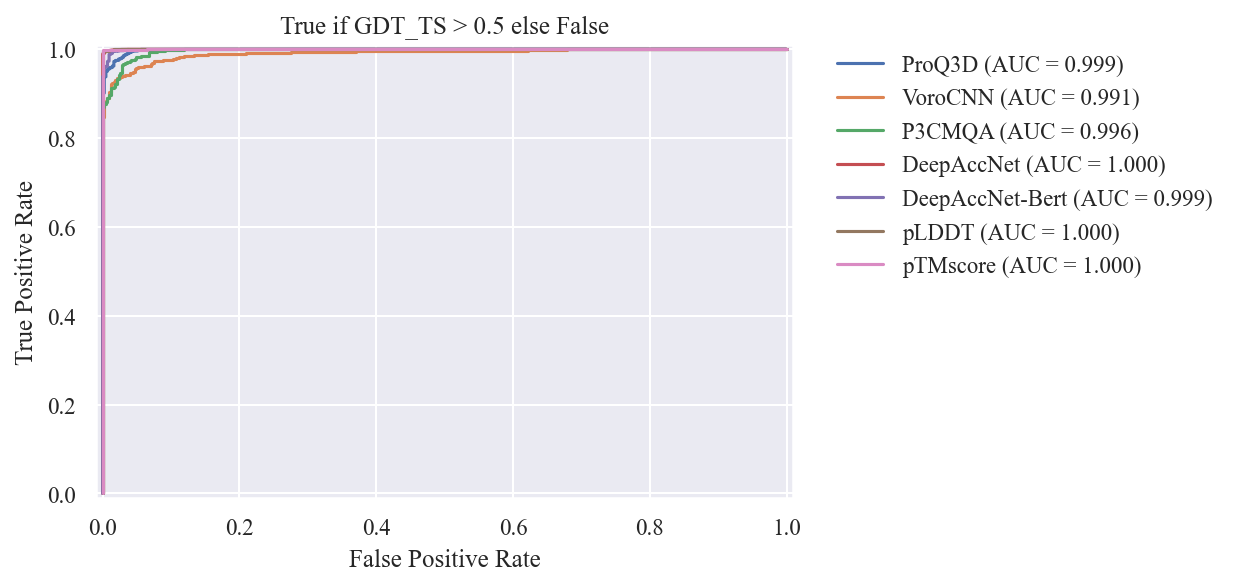

<Figure size 750x600 with 0 Axes>

True     55548
False      752
Name: GDT_TS_0.6, dtype: int64


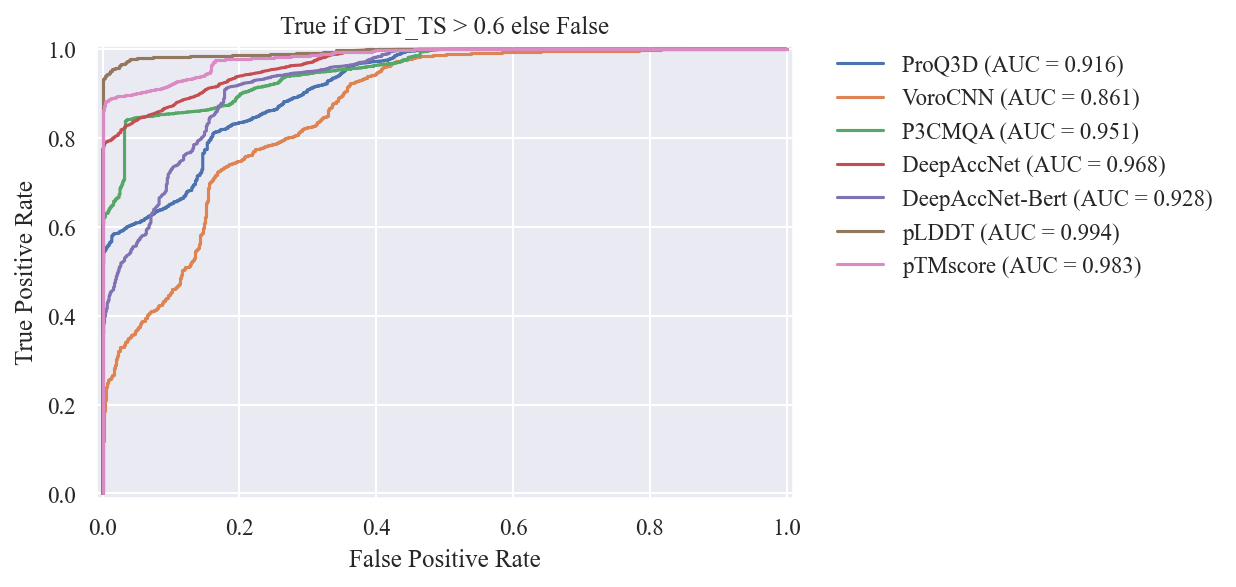

<Figure size 750x600 with 0 Axes>

True     54802
False     1498
Name: GDT_TS_0.7, dtype: int64


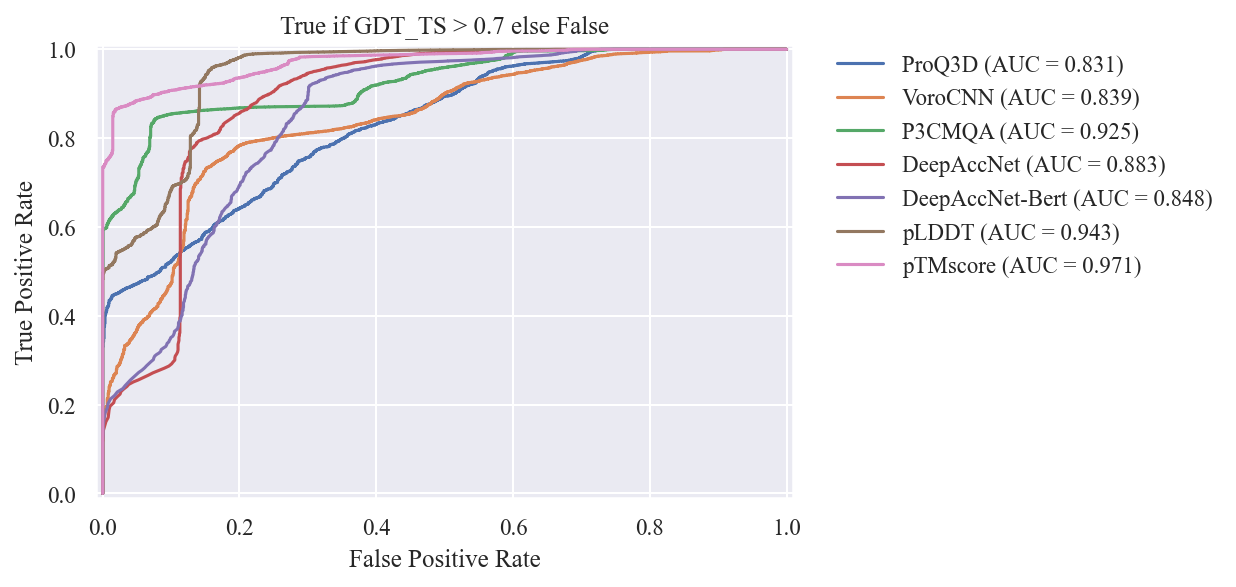

<Figure size 750x600 with 0 Axes>

True     52450
False     3850
Name: GDT_TS_0.8, dtype: int64


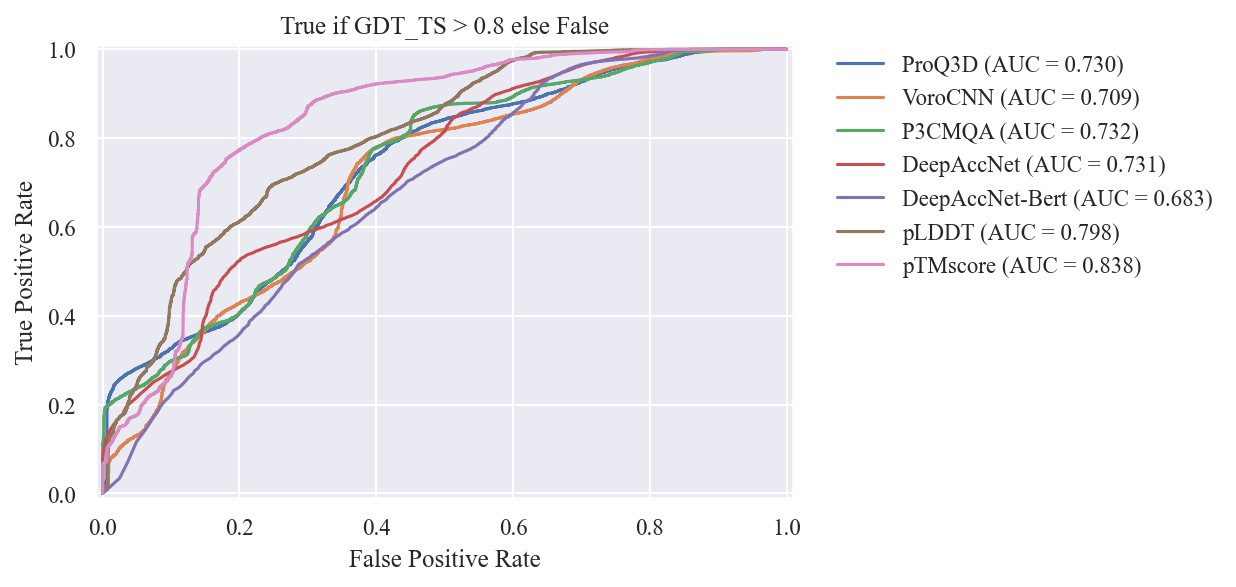

<Figure size 750x600 with 0 Axes>

True     55265
False     1035
Name: GDT_HA_0.5, dtype: int64


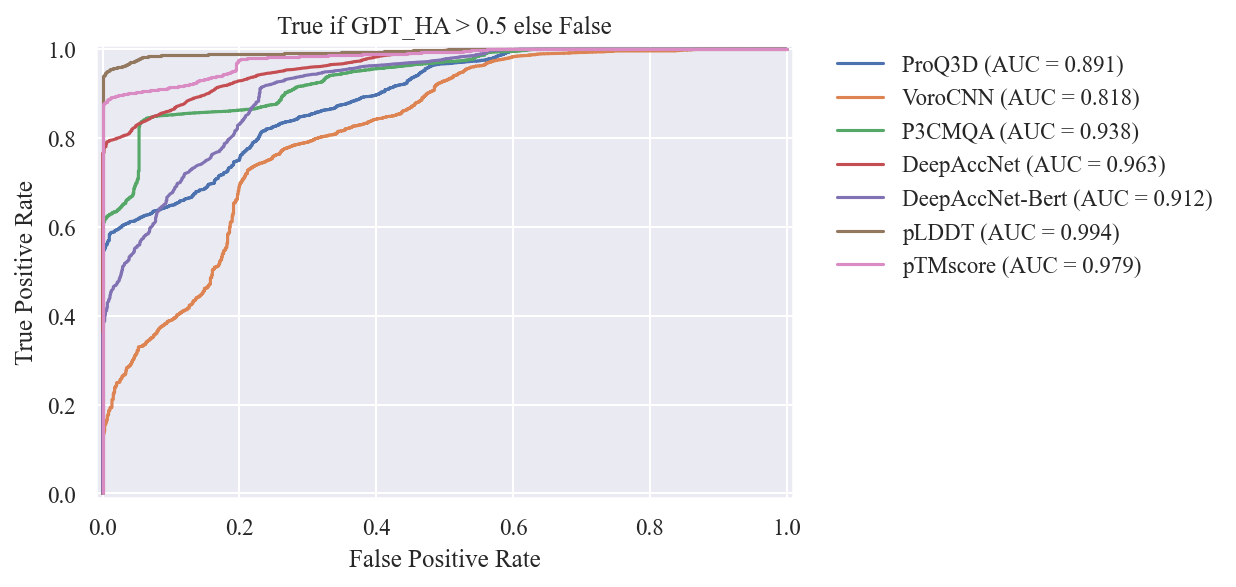

<Figure size 750x600 with 0 Axes>

True     54156
False     2144
Name: GDT_HA_0.6, dtype: int64


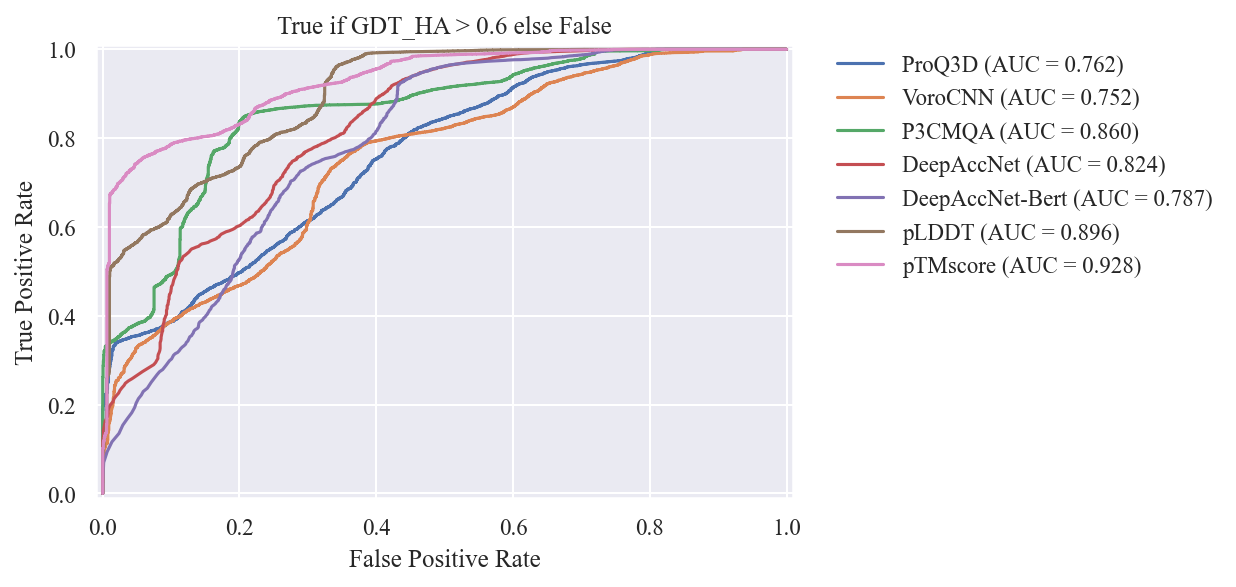

<Figure size 750x600 with 0 Axes>

True     48000
False     8300
Name: GDT_HA_0.7, dtype: int64


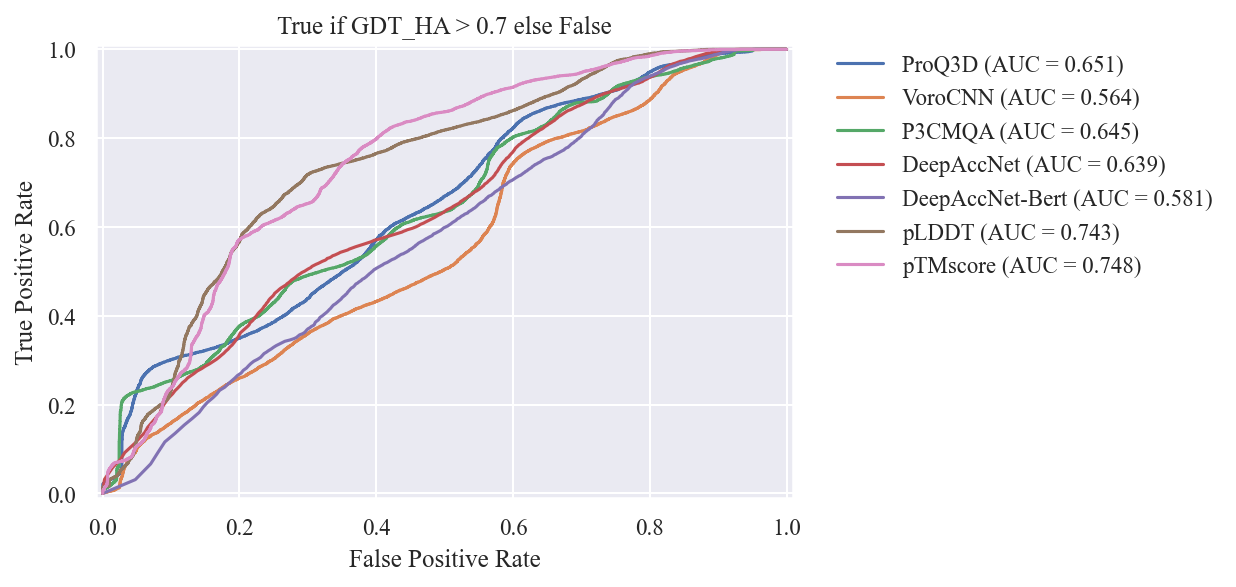

<Figure size 750x600 with 0 Axes>

True     36511
False    19789
Name: GDT_HA_0.8, dtype: int64


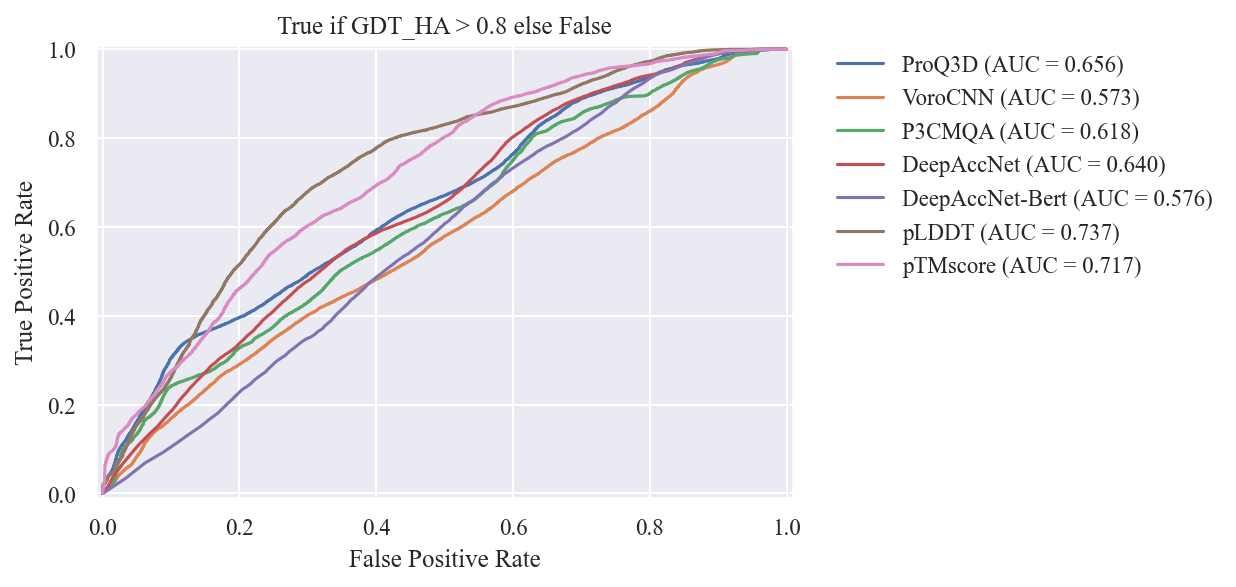

<Figure size 750x600 with 0 Axes>

True     55870
False      430
Name: TMscore_0.5, dtype: int64


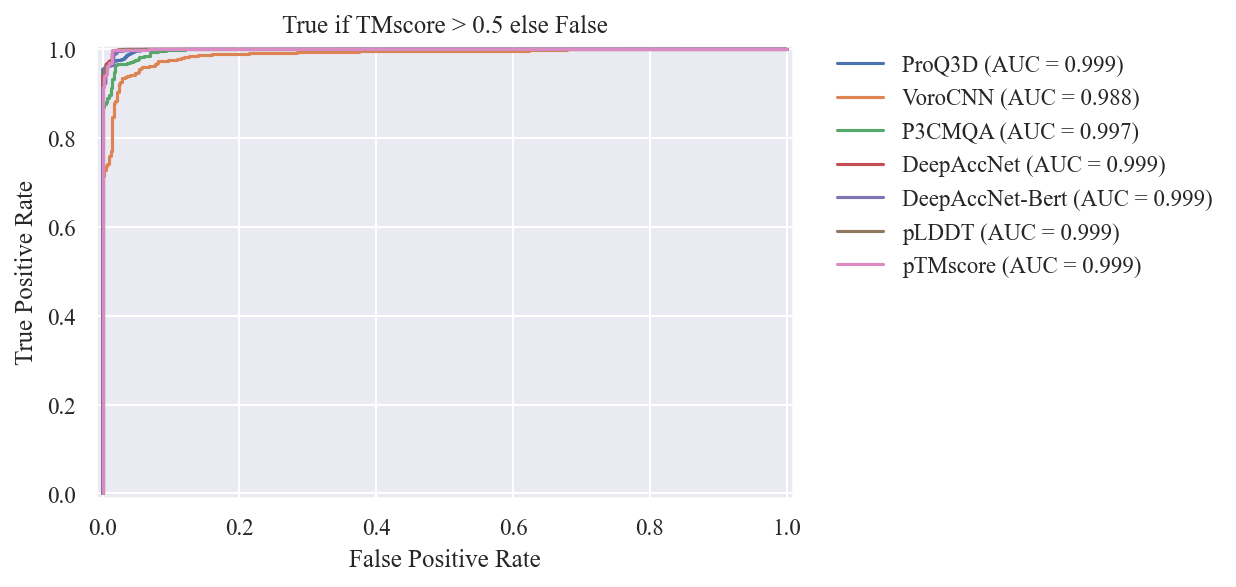

<Figure size 750x600 with 0 Axes>

True     55829
False      471
Name: TMscore_0.6, dtype: int64


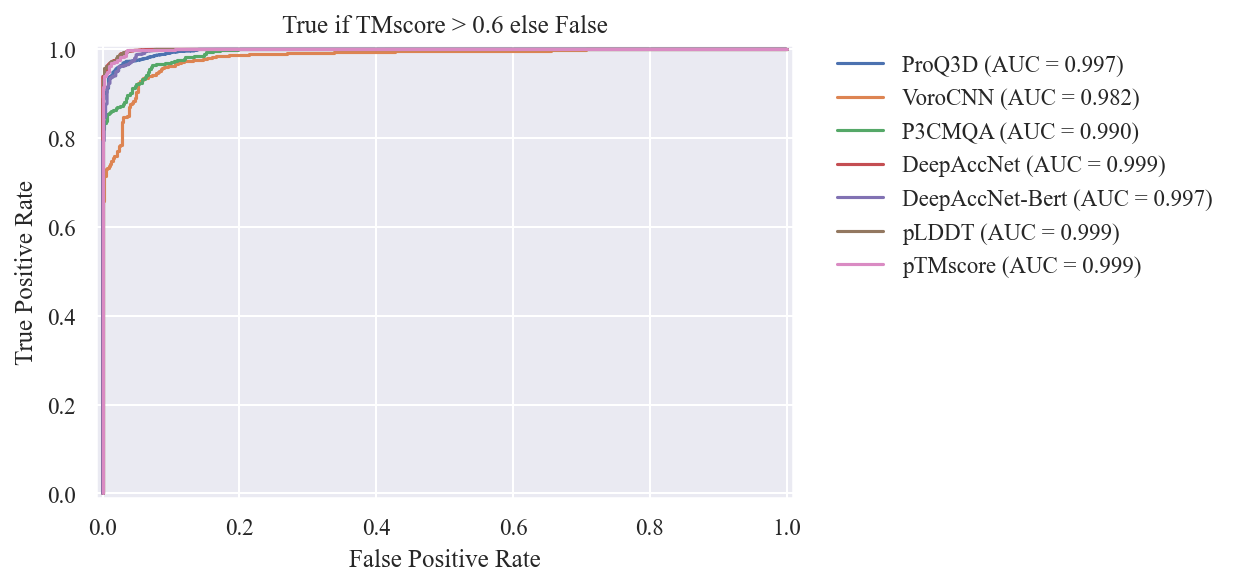

<Figure size 750x600 with 0 Axes>

True     55350
False      950
Name: TMscore_0.7, dtype: int64


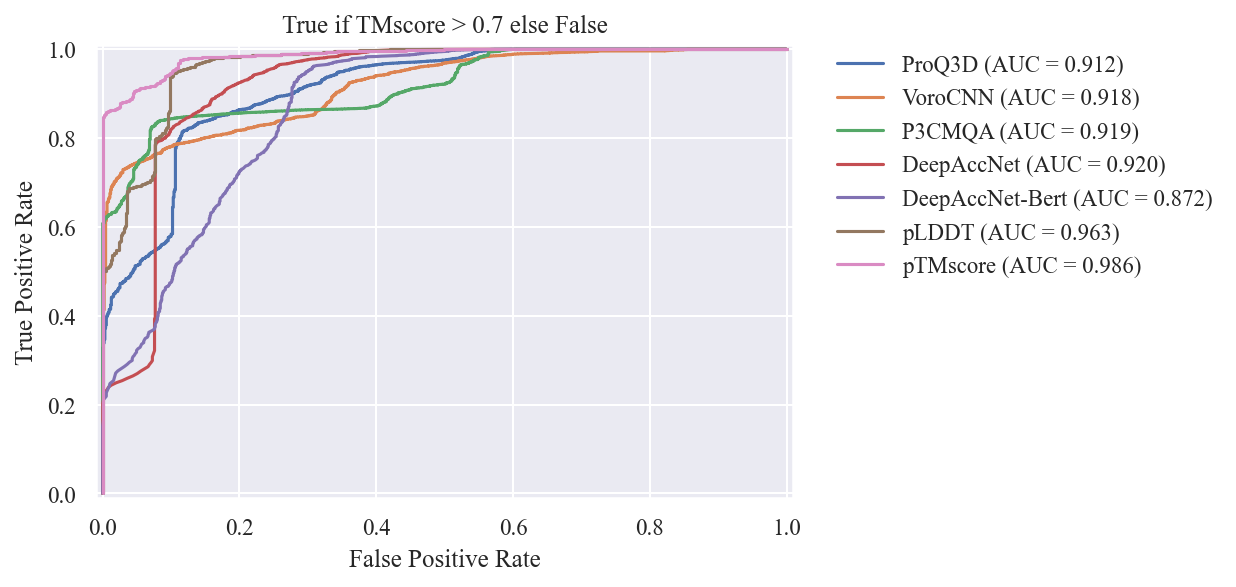

<Figure size 750x600 with 0 Axes>

True     53566
False     2734
Name: TMscore_0.8, dtype: int64


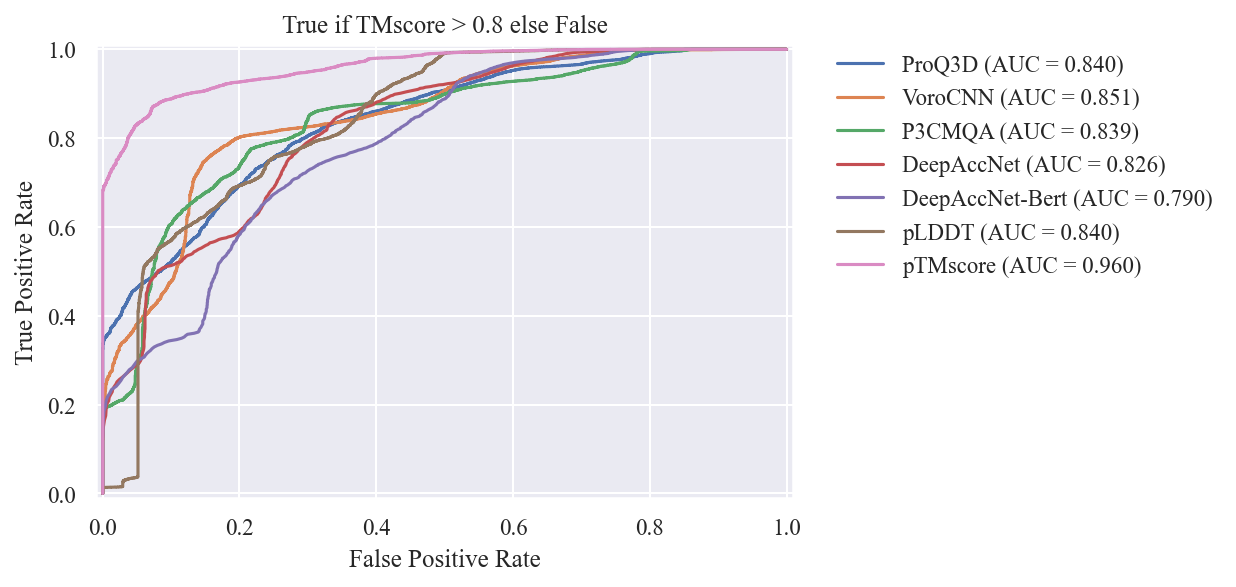

<Figure size 750x600 with 0 Axes>

True     50682
False     5618
Name: Mean_LDDT_0.5, dtype: int64


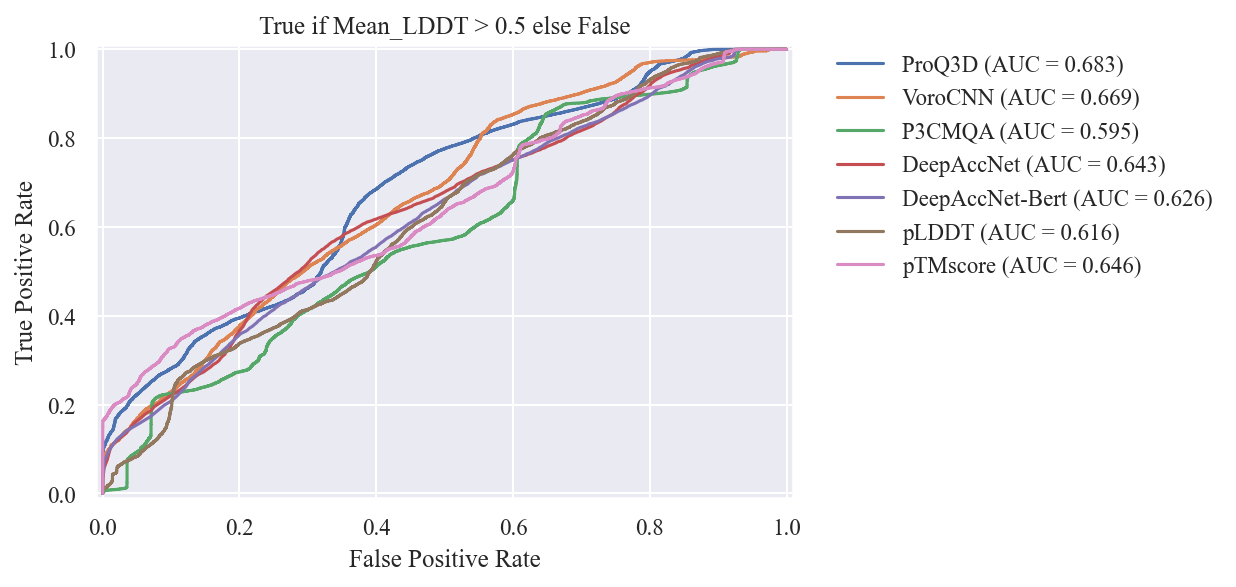

<Figure size 750x600 with 0 Axes>

True     50652
False     5648
Name: Mean_LDDT_0.6, dtype: int64


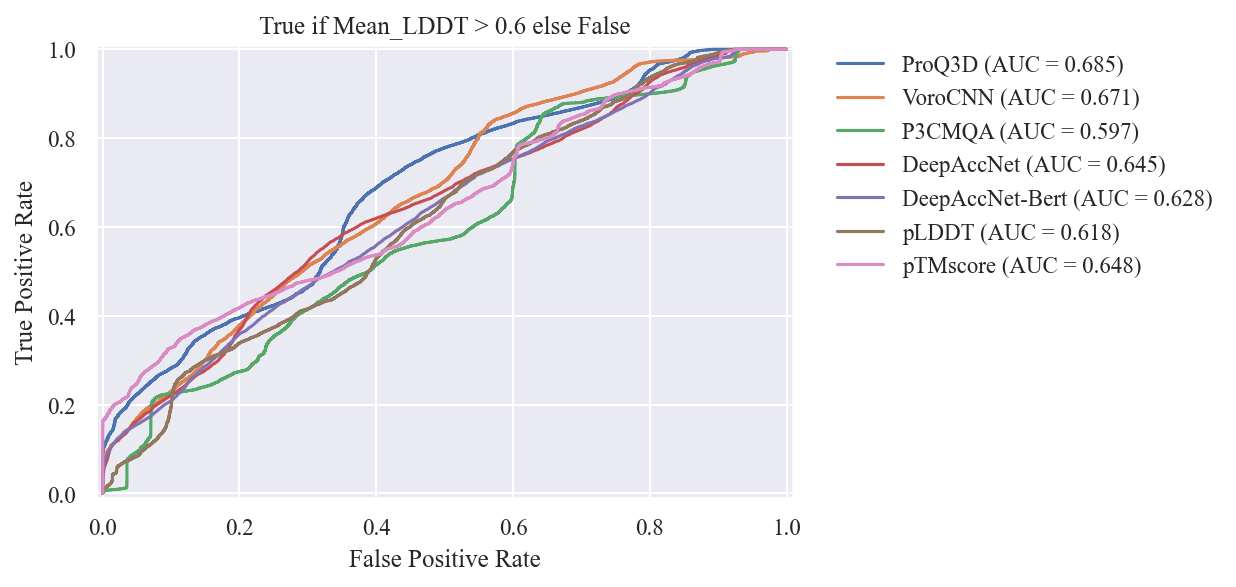

<Figure size 750x600 with 0 Axes>

True     49838
False     6462
Name: Mean_LDDT_0.7, dtype: int64


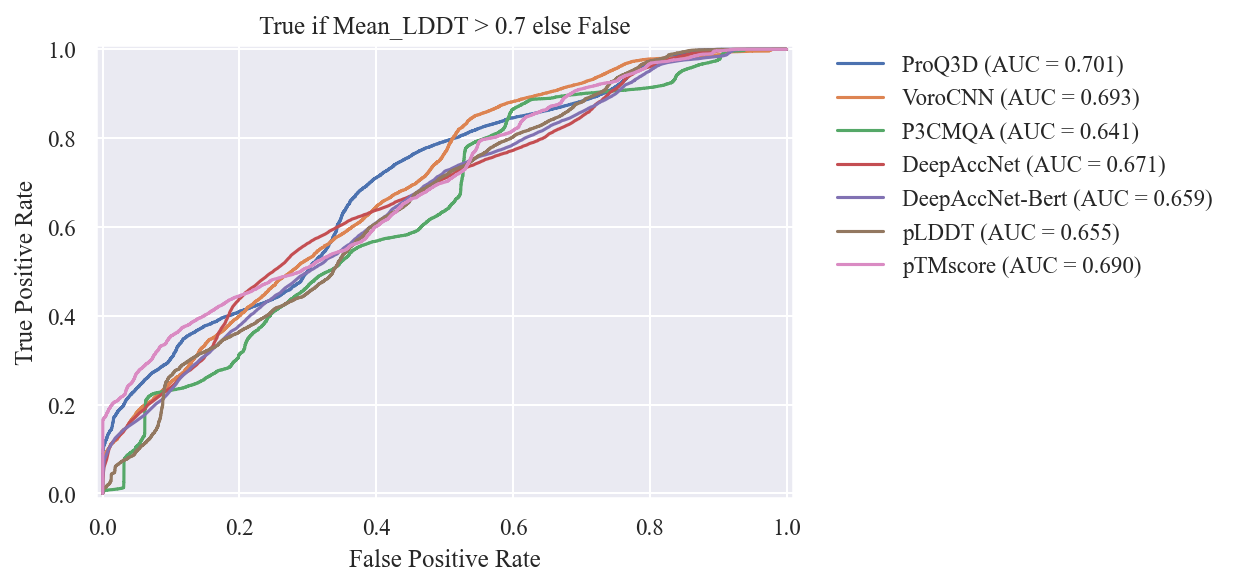

<Figure size 750x600 with 0 Axes>

True     45204
False    11096
Name: Mean_LDDT_0.8, dtype: int64


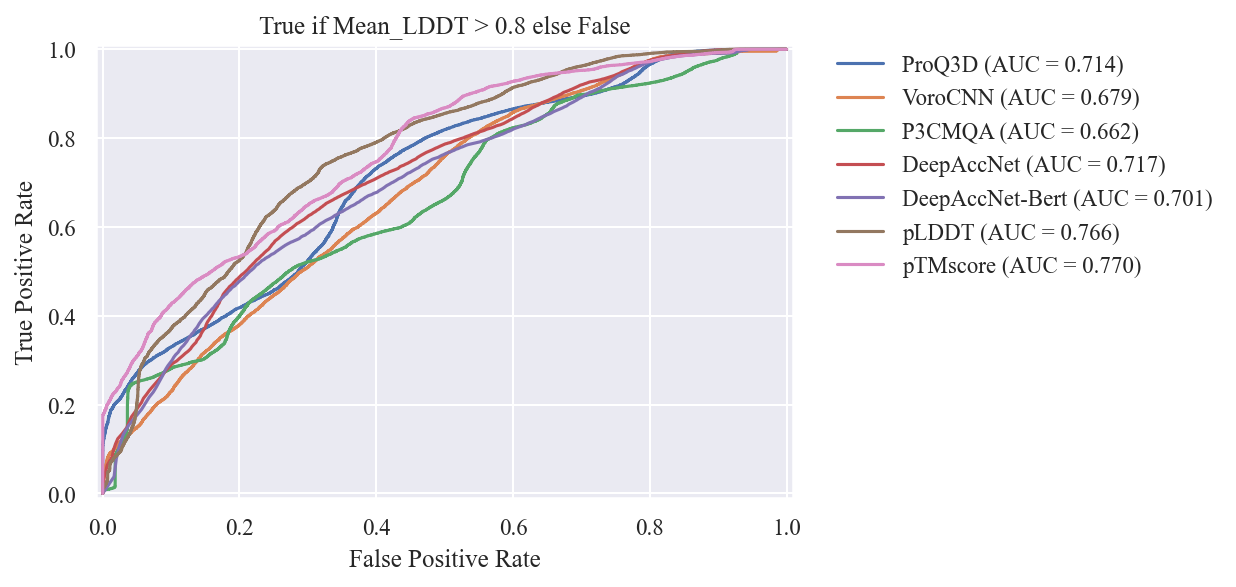

<Figure size 750x600 with 0 Axes>

In [14]:
# For model structures with pTMscore
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
data = df[~df['pTMscore'].isna()]
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        print(data[l].value_counts())
        x = data[l]
        for score in methods:
            y = data[score]
            if y.isna().any():
                print(score)
                continue
            fpr, tpr, thres = roc_curve(x, y)
            a= auc(fpr, tpr)
            plt.title(f'True if {label} > {threshold} else False')
            plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
            plt.legend()
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, facecolor='white', edgecolor='white')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.figure(figsize=(5, 4))
        plt.tight_layout()
        plt.show()

## Case 2: Negative examples are structures whose label value is lower than the maximum label value by more than threshold

In [15]:
# Against gdtts
mqa_methods = ['DOPE', 'SOAP', 'ProQ3D', 'SBROD', 'VoroCNN', 'P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert']
methods = mqa_methods + ['pLDDT', 'pTMscore']

In [16]:
def split_tf_in_target(group: pd.DataFrame, label: str, threshold: float):
    """False for structures that are a threshold value away from the maximum label value in the target

    Args:
        group (pd.DataFrame): DataFrame of a target.
        label (str, optional): label name. Defaults to 'GDT_TS'.
        threshold (float, optional): Threshold. Defaults to 0.05.
    """
    max_value = group[label].max()
    l = f'{label}-{threshold}'
    group[l] = group[label] + threshold > max_value
    if group[l].all():
        return None
    return group
label = 'GDT_TS'
threshold = 0.05
rel_df = df.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
l = f'{label}-{threshold}'
print(rel_df[l].value_counts())
print(rel_df['Target'].unique().size)

True     28126
False    10674
Name: GDT_TS-0.05, dtype: int64
101


In [17]:
results = []
for method in methods:
    aucs = []
    for name, group in rel_df.groupby('Target'):
        if group[method].isna().any():
                continue
        fpr, tpr, thres = roc_curve(group[l], group[method])
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)
    results.append({'Method': method, 'AUC': np.mean(aucs)})
pd.DataFrame(results)

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Method   AUC
0             DOPE 0.630
1             SOAP 0.641
2           ProQ3D 0.609
3            SBROD 0.511
4          VoroCNN 0.575
5           P3CMQA 0.601
6       DeepAccNet 0.682
7  DeepAccNet-Bert 0.656
8            pLDDT 0.703
9         pTMscore   NaN

<ipython-input-18-f0f6c43aa79f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Label'] = sample_df[f'{label}-{threshold}']
<ipython-input-18-f0f6c43aa79f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Label'] = sample_df['Label'].astype(str)


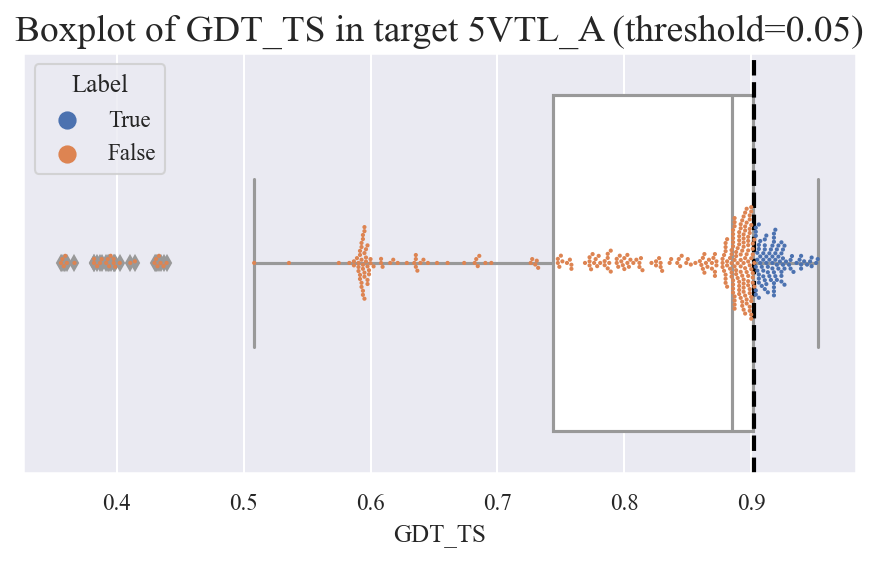

In [18]:
sample_target = rel_df['Target'].unique()[2]
threshold = 0.05
sample_df = rel_df[rel_df['Target'] == sample_target]
label = 'GDT_TS'
sample_df['Label'] = sample_df[f'{label}-{threshold}']
sample_df['Label'] = sample_df['Label'].astype(str)
sns.boxplot(data=sample_df, x=label, color='white')
sns.swarmplot(data=sample_df, x=label, s=2, hue='Label', y=[''] * len(sample_df), hue_order=['True', 'False'])
x = sample_df[label].max() - threshold
plt.axvline(x=x, color='black', linestyle='--', linewidth=2)
plt.title(f'Boxplot of GDT_TS in target {sample_target} (threshold={threshold})', fontsize=18)
plt.tight_layout()

### For all structures

GDT_TS 0.05
True     28126
False    10674
Name: GDT_TS-0.05, dtype: int64
101


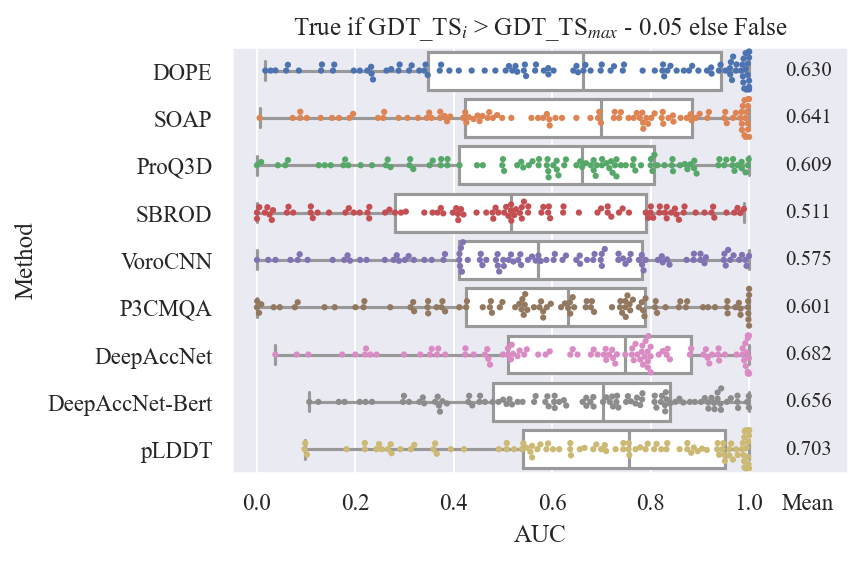

AUC
Method               
DOPE            0.630
DeepAccNet      0.682
DeepAccNet-Bert 0.656
P3CMQA          0.601
ProQ3D          0.609
SBROD           0.511
SOAP            0.641
VoroCNN         0.575
pLDDT           0.703

GDT_TS 0.1
True     11193
False     3607
Name: GDT_TS-0.1, dtype: int64
39


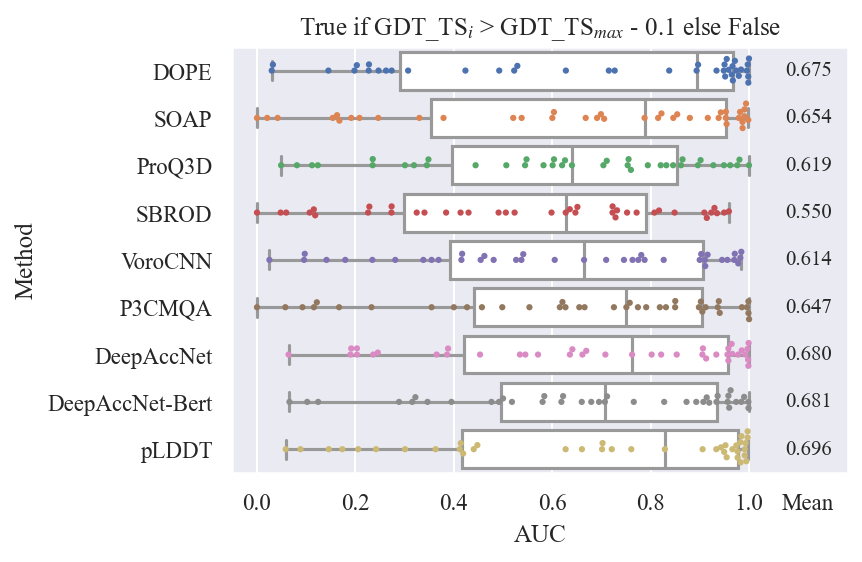

AUC
Method               
DOPE            0.675
DeepAccNet      0.680
DeepAccNet-Bert 0.681
P3CMQA          0.647
ProQ3D          0.619
SBROD           0.550
SOAP            0.654
VoroCNN         0.614
pLDDT           0.696

GDT_TS 0.15
True     6291
False    1509
Name: GDT_TS-0.15, dtype: int64
20


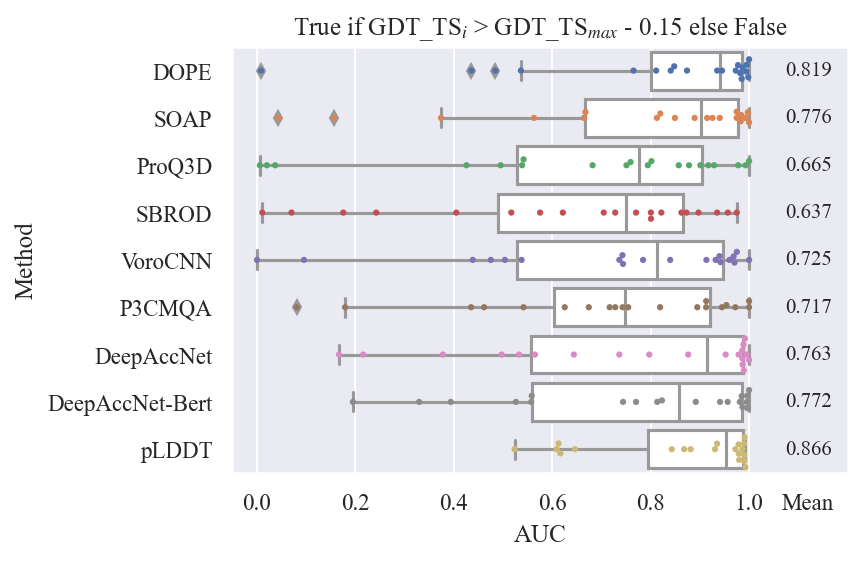

AUC
Method               
DOPE            0.819
DeepAccNet      0.763
DeepAccNet-Bert 0.772
P3CMQA          0.717
ProQ3D          0.665
SBROD           0.637
SOAP            0.776
VoroCNN         0.725
pLDDT           0.866

GDT_TS 0.2
True     3499
False     701
Name: GDT_TS-0.2, dtype: int64
11


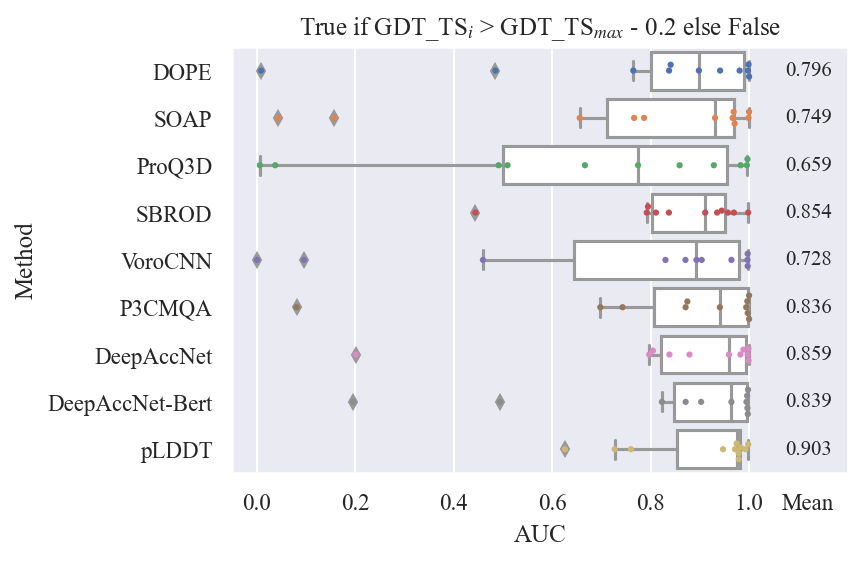

AUC
Method               
DOPE            0.796
DeepAccNet      0.859
DeepAccNet-Bert 0.839
P3CMQA          0.836
ProQ3D          0.659
SBROD           0.854
SOAP            0.749
VoroCNN         0.728
pLDDT           0.903

GDT_HA 0.05
True     56193
False    21407
Name: GDT_HA-0.05, dtype: int64
205


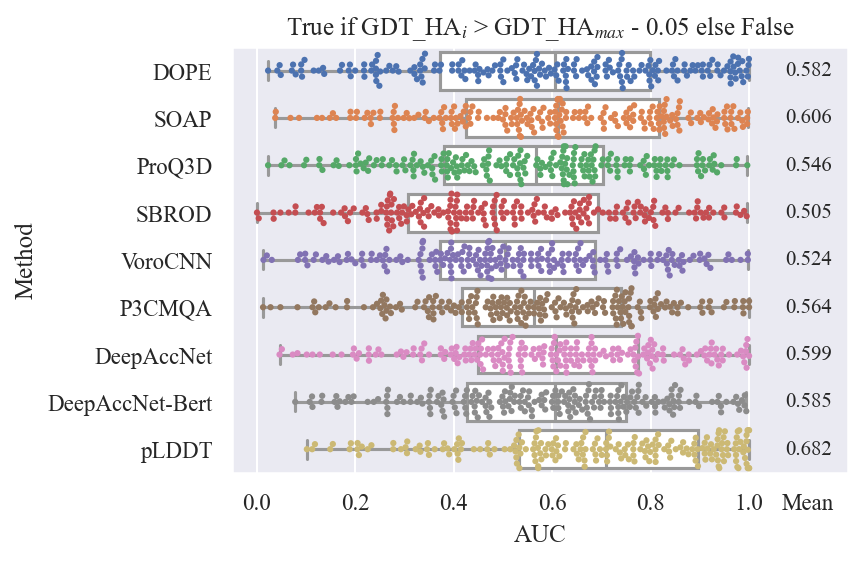

AUC
Method               
DOPE            0.582
DeepAccNet      0.599
DeepAccNet-Bert 0.585
P3CMQA          0.564
ProQ3D          0.546
SBROD           0.505
SOAP            0.606
VoroCNN         0.524
pLDDT           0.682

GDT_HA 0.1
True     17183
False     5617
Name: GDT_HA-0.1, dtype: int64
59


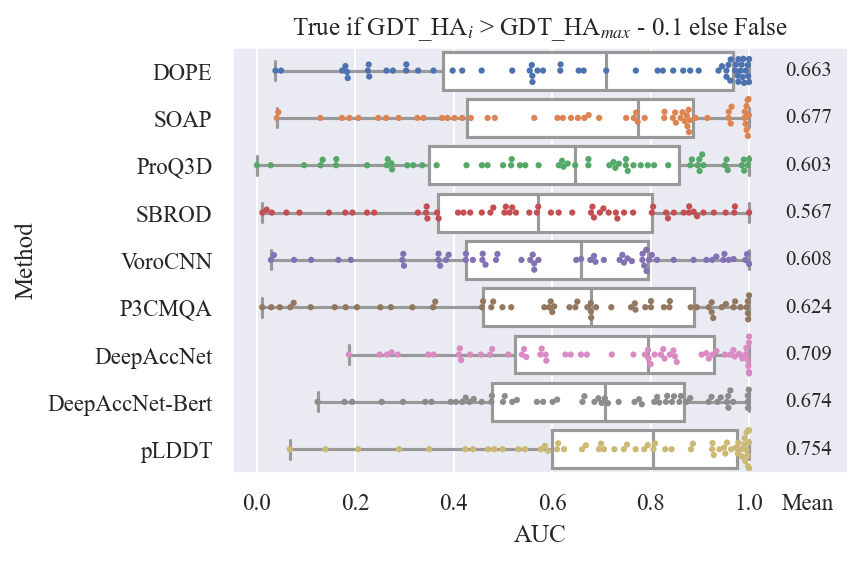

AUC
Method               
DOPE            0.663
DeepAccNet      0.709
DeepAccNet-Bert 0.674
P3CMQA          0.624
ProQ3D          0.603
SBROD           0.567
SOAP            0.677
VoroCNN         0.608
pLDDT           0.754

GDT_HA 0.15
True     8830
False    1770
Name: GDT_HA-0.15, dtype: int64
28


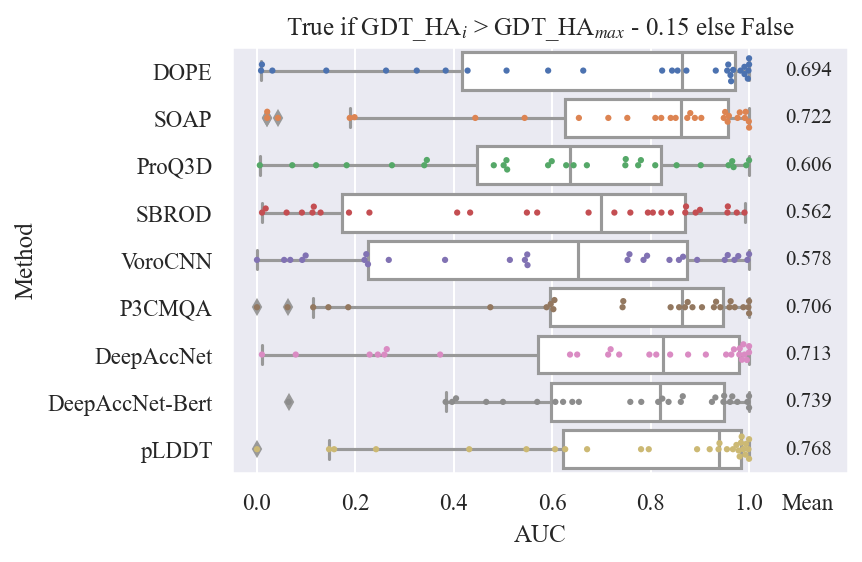

AUC
Method               
DOPE            0.694
DeepAccNet      0.713
DeepAccNet-Bert 0.739
P3CMQA          0.706
ProQ3D          0.606
SBROD           0.562
SOAP            0.722
VoroCNN         0.578
pLDDT           0.768

GDT_HA 0.2
True     3739
False    1061
Name: GDT_HA-0.2, dtype: int64
12


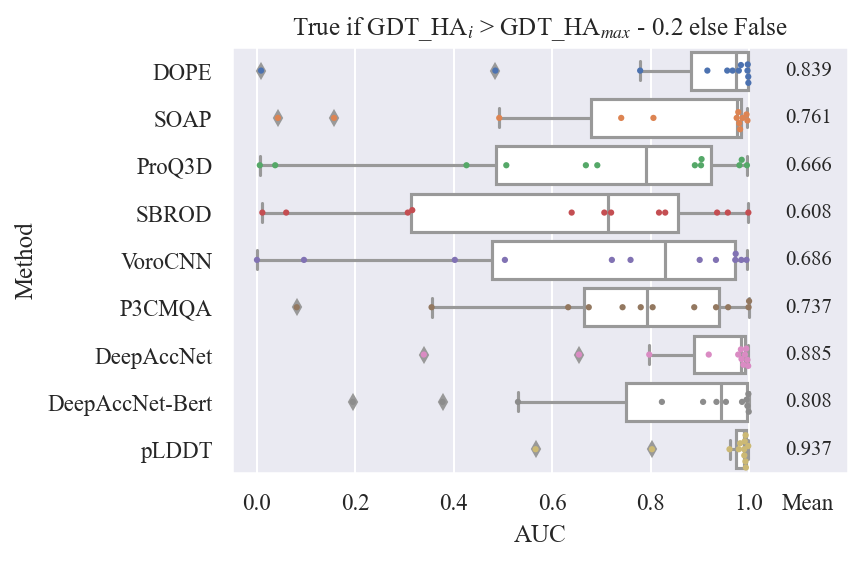

AUC
Method               
DOPE            0.839
DeepAccNet      0.885
DeepAccNet-Bert 0.808
P3CMQA          0.737
ProQ3D          0.666
SBROD           0.608
SOAP            0.761
VoroCNN         0.686
pLDDT           0.937

TMscore 0.05
True     15589
False     6811
Name: TMscore-0.05, dtype: int64
57


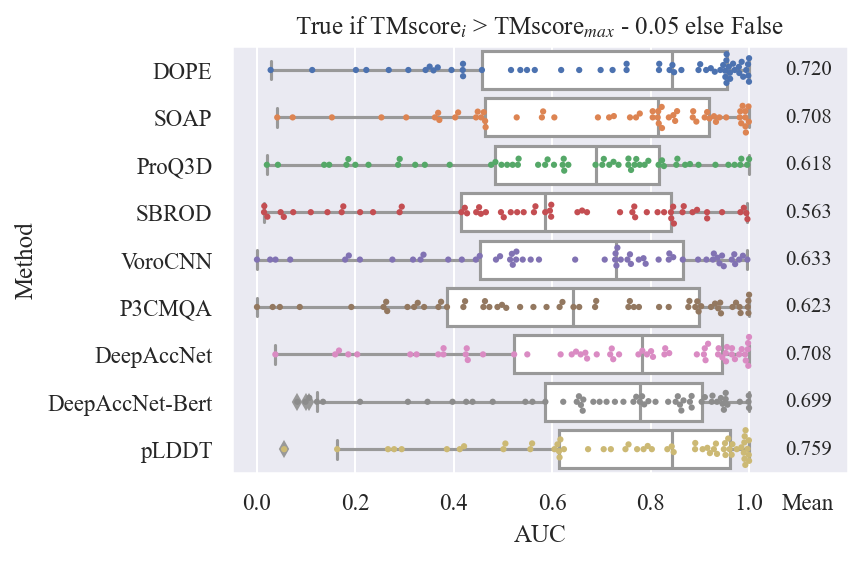

AUC
Method               
DOPE            0.720
DeepAccNet      0.708
DeepAccNet-Bert 0.699
P3CMQA          0.623
ProQ3D          0.618
SBROD           0.563
SOAP            0.708
VoroCNN         0.633
pLDDT           0.759

TMscore 0.1
True     6113
False    2687
Name: TMscore-0.1, dtype: int64
23


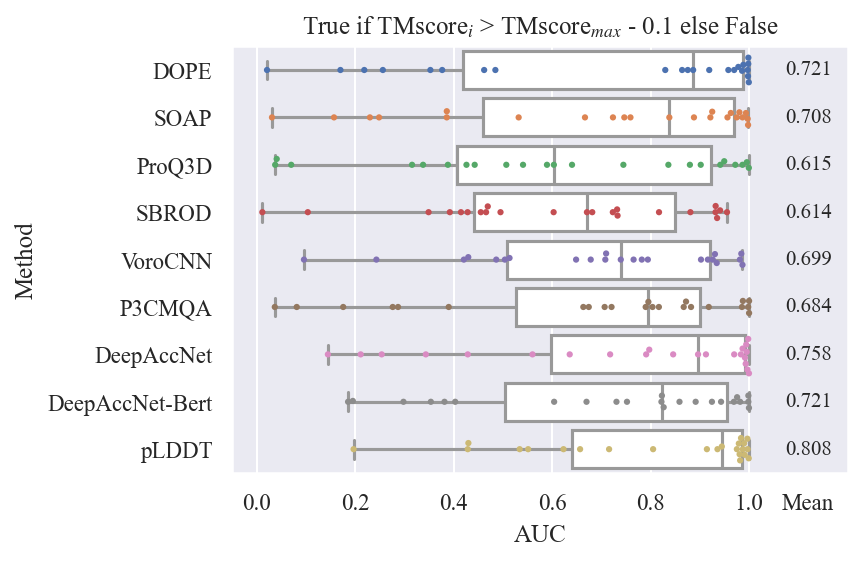

AUC
Method               
DOPE            0.721
DeepAccNet      0.758
DeepAccNet-Bert 0.721
P3CMQA          0.684
ProQ3D          0.615
SBROD           0.614
SOAP            0.708
VoroCNN         0.699
pLDDT           0.808

TMscore 0.15
True     4565
False    1635
Name: TMscore-0.15, dtype: int64
16


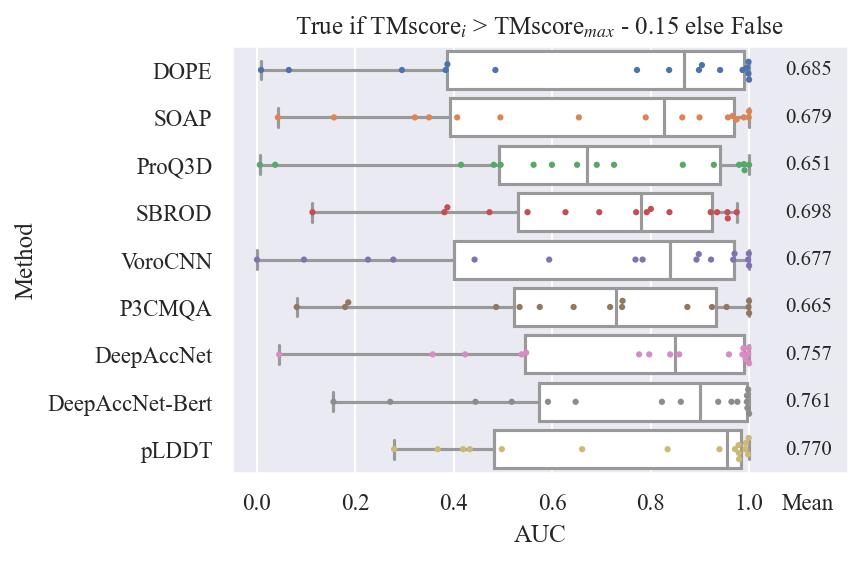

AUC
Method               
DOPE            0.685
DeepAccNet      0.757
DeepAccNet-Bert 0.761
P3CMQA          0.665
ProQ3D          0.651
SBROD           0.698
SOAP            0.679
VoroCNN         0.677
pLDDT           0.770

TMscore 0.2
True     2954
False     846
Name: TMscore-0.2, dtype: int64
10


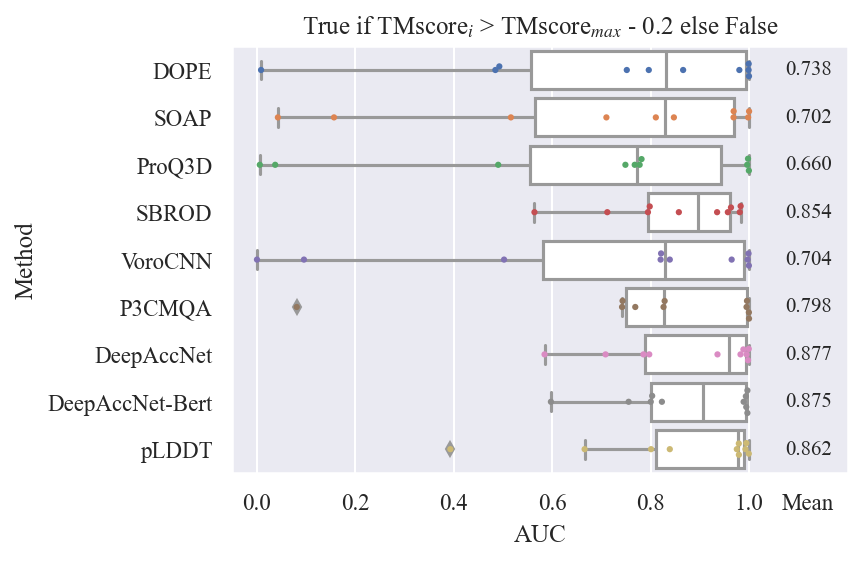

AUC
Method               
DOPE            0.738
DeepAccNet      0.877
DeepAccNet-Bert 0.875
P3CMQA          0.798
ProQ3D          0.660
SBROD           0.854
SOAP            0.702
VoroCNN         0.704
pLDDT           0.862

In [19]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore']
thresholds = [0.05, 0.1, 0.15, 0.2]
for label in labels:
    for threshold in thresholds:
        rel_df = df.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
        l = f'{label}-{threshold}'
        print(label, threshold)
        print(rel_df[l].value_counts())
        print(rel_df['Target'].unique().size)
        results = []
        for method in methods:
            aucs = []
            targets = []
            for name, group in rel_df.groupby('Target'):
                if group[method].isna().any():
                    continue
                fpr, tpr, thres = roc_curve(group[l], group[method])
                auc_score = auc(fpr, tpr)
                aucs.append(auc_score)
                targets.append(name)
            if len(aucs) == 0:
                continue
            results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
        cdf = pd.concat(results)
        plt.title(f'True if {label}$_{{i}}$ > {label}$_{{max}}$ - {threshold} else False')
        sns.boxplot(data=cdf, y='Method', x='AUC', color='white')
        sns.swarmplot(data=cdf, y='Method', x='AUC', s=3)
        xticks_max = 1.12
        plt.xlim(-0.05, 1.2)
        xticks = np.append(np.arange(0, 1.2, 0.2), [xticks_max])
        xticks_str = list(map(lambda x: f'{x:.1f}', xticks))
        xticks_str[-1] = 'Mean'
        plt.xticks(xticks, xticks_str)
        plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
        mean_series = cdf.groupby('Method').mean()['AUC']
        for i, method in enumerate(methods):
            if method not in mean_series.index:
                continue
            value = mean_series[method]
            plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
        plt.tight_layout()
        plt.show()
        display(cdf.groupby('Method').mean())

### For structures with pTMscore

GDT_TS 0.05
True     13213
False     4887
Name: GDT_TS-0.05, dtype: int64
94


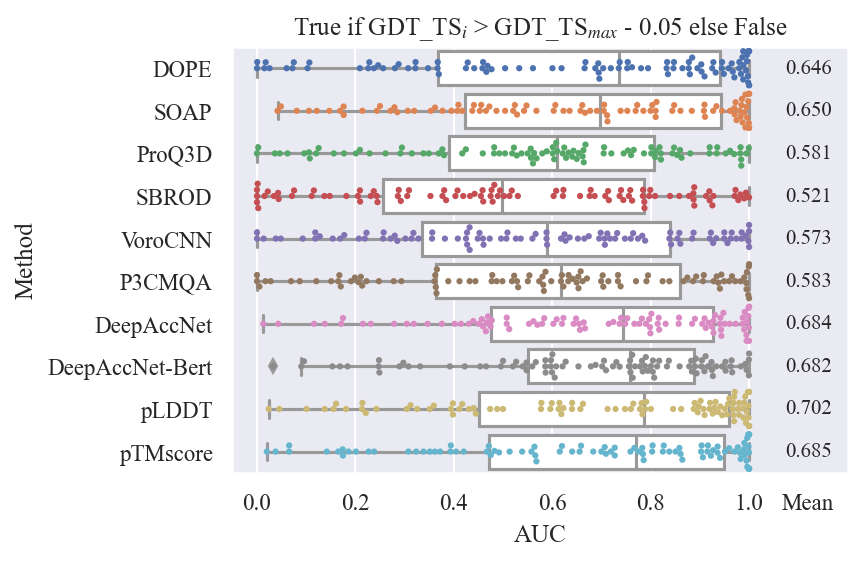

AUC
Method               
DOPE            0.646
DeepAccNet      0.684
DeepAccNet-Bert 0.682
P3CMQA          0.583
ProQ3D          0.581
SBROD           0.521
SOAP            0.650
VoroCNN         0.573
pLDDT           0.702
pTMscore        0.685

GDT_TS 0.1
True     5057
False    1843
Name: GDT_TS-0.1, dtype: int64
36


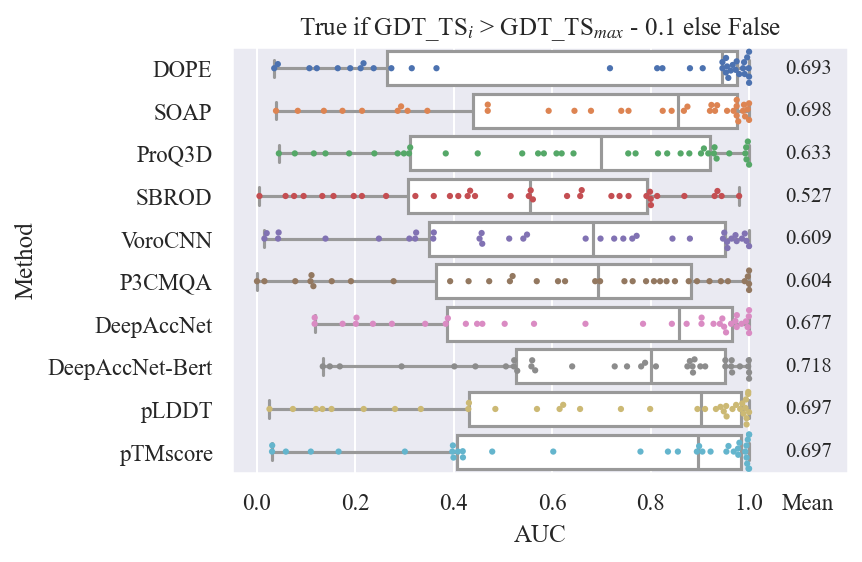

AUC
Method               
DOPE            0.693
DeepAccNet      0.677
DeepAccNet-Bert 0.718
P3CMQA          0.604
ProQ3D          0.633
SBROD           0.527
SOAP            0.698
VoroCNN         0.609
pLDDT           0.697
pTMscore        0.697

GDT_TS 0.15
True     2570
False     730
Name: GDT_TS-0.15, dtype: int64
17


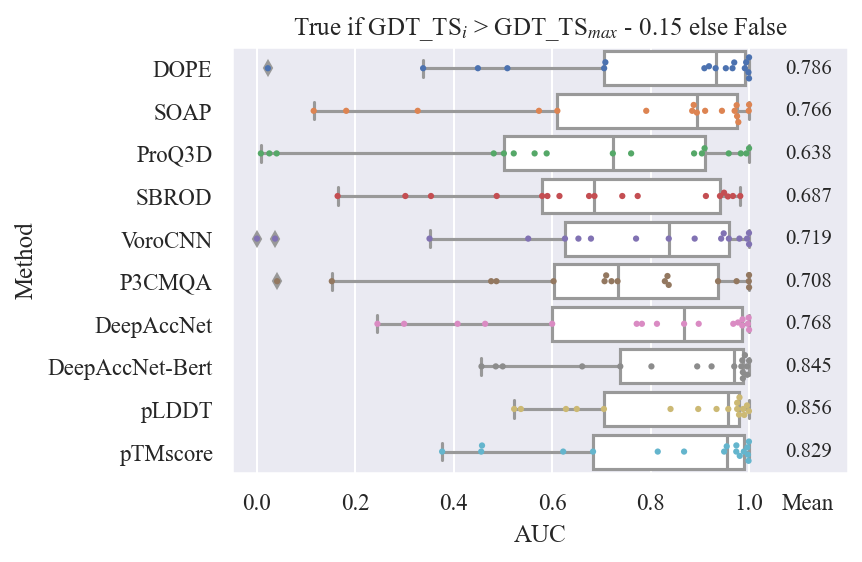

AUC
Method               
DOPE            0.786
DeepAccNet      0.768
DeepAccNet-Bert 0.845
P3CMQA          0.708
ProQ3D          0.638
SBROD           0.687
SOAP            0.766
VoroCNN         0.719
pLDDT           0.856
pTMscore        0.829

GDT_TS 0.2
True     1501
False     299
Name: GDT_TS-0.2, dtype: int64
9


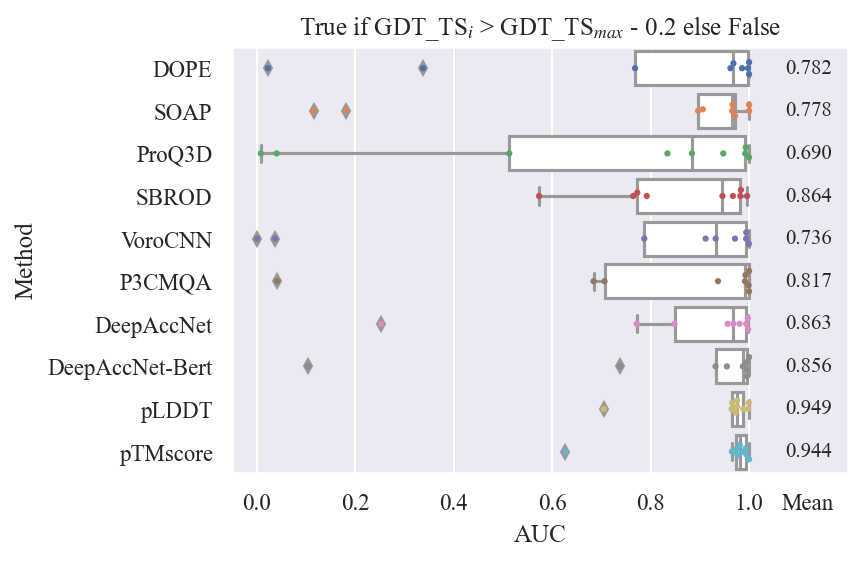

AUC
Method               
DOPE            0.782
DeepAccNet      0.863
DeepAccNet-Bert 0.856
P3CMQA          0.817
ProQ3D          0.690
SBROD           0.864
SOAP            0.778
VoroCNN         0.736
pLDDT           0.949
pTMscore        0.944

GDT_HA 0.05
True     24940
False     9760
Name: GDT_HA-0.05, dtype: int64
182


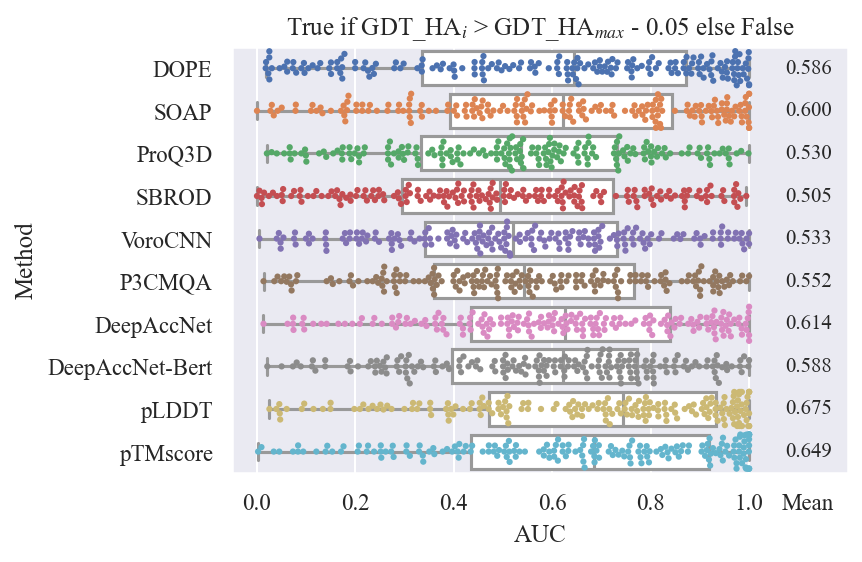

AUC
Method               
DOPE            0.586
DeepAccNet      0.614
DeepAccNet-Bert 0.588
P3CMQA          0.552
ProQ3D          0.530
SBROD           0.505
SOAP            0.600
VoroCNN         0.533
pLDDT           0.675
pTMscore        0.649

GDT_HA 0.1
True     7258
False    2742
Name: GDT_HA-0.1, dtype: int64
52


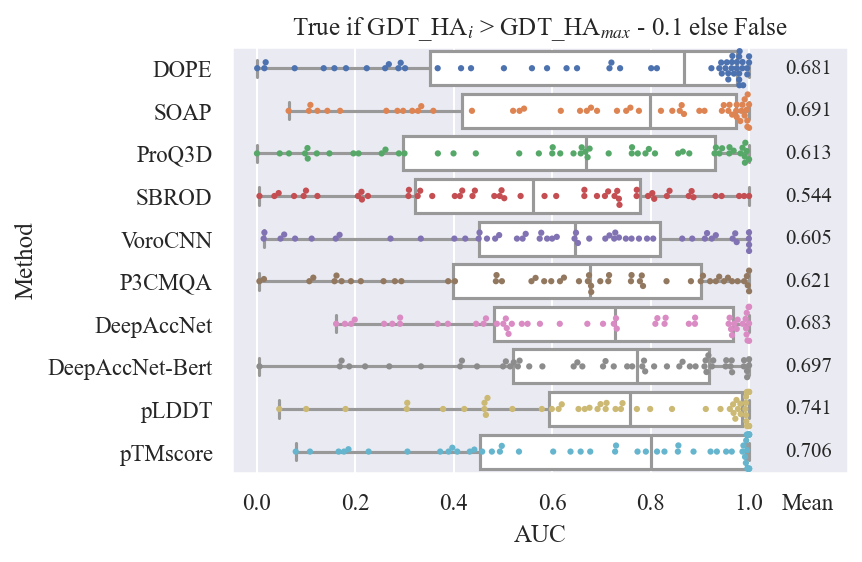

AUC
Method               
DOPE            0.681
DeepAccNet      0.683
DeepAccNet-Bert 0.697
P3CMQA          0.621
ProQ3D          0.613
SBROD           0.544
SOAP            0.691
VoroCNN         0.605
pLDDT           0.741
pTMscore        0.706

GDT_HA 0.15
True     3608
False     792
Name: GDT_HA-0.15, dtype: int64
23


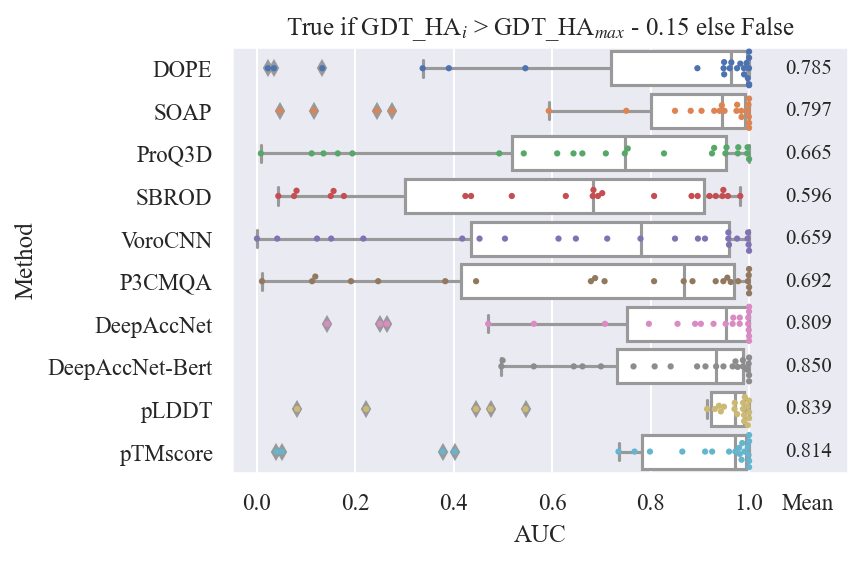

AUC
Method               
DOPE            0.785
DeepAccNet      0.809
DeepAccNet-Bert 0.850
P3CMQA          0.692
ProQ3D          0.665
SBROD           0.596
SOAP            0.797
VoroCNN         0.659
pLDDT           0.839
pTMscore        0.814

GDT_HA 0.2
True     1718
False     482
Name: GDT_HA-0.2, dtype: int64
11


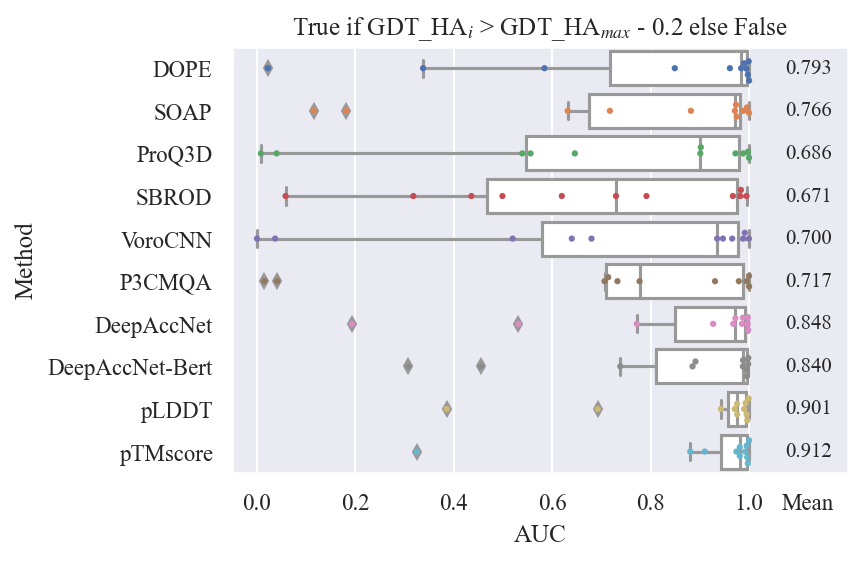

AUC
Method               
DOPE            0.793
DeepAccNet      0.848
DeepAccNet-Bert 0.840
P3CMQA          0.717
ProQ3D          0.686
SBROD           0.671
SOAP            0.766
VoroCNN         0.700
pLDDT           0.901
pTMscore        0.912

TMscore 0.05
True     6846
False    3154
Name: TMscore-0.05, dtype: int64
51


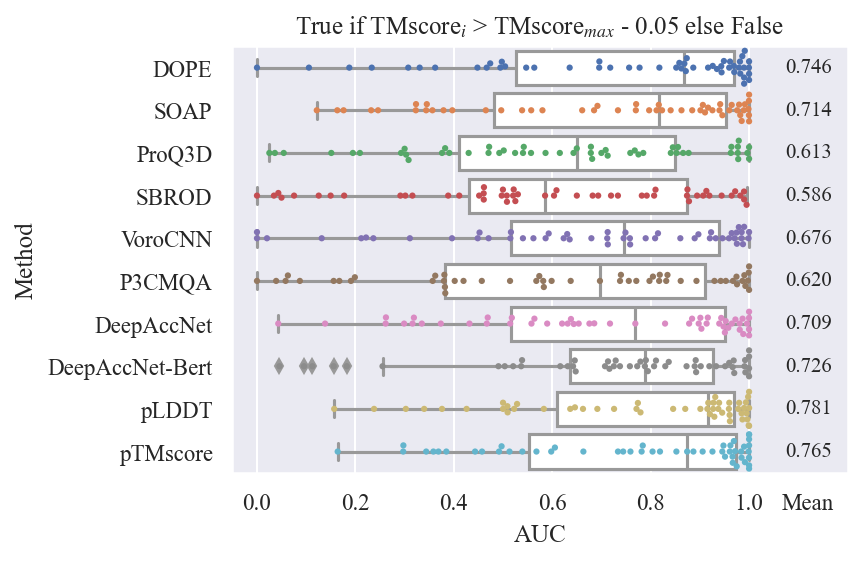

AUC
Method               
DOPE            0.746
DeepAccNet      0.709
DeepAccNet-Bert 0.726
P3CMQA          0.620
ProQ3D          0.613
SBROD           0.586
SOAP            0.714
VoroCNN         0.676
pLDDT           0.781
pTMscore        0.765

TMscore 0.1
True     2512
False    1488
Name: TMscore-0.1, dtype: int64
21


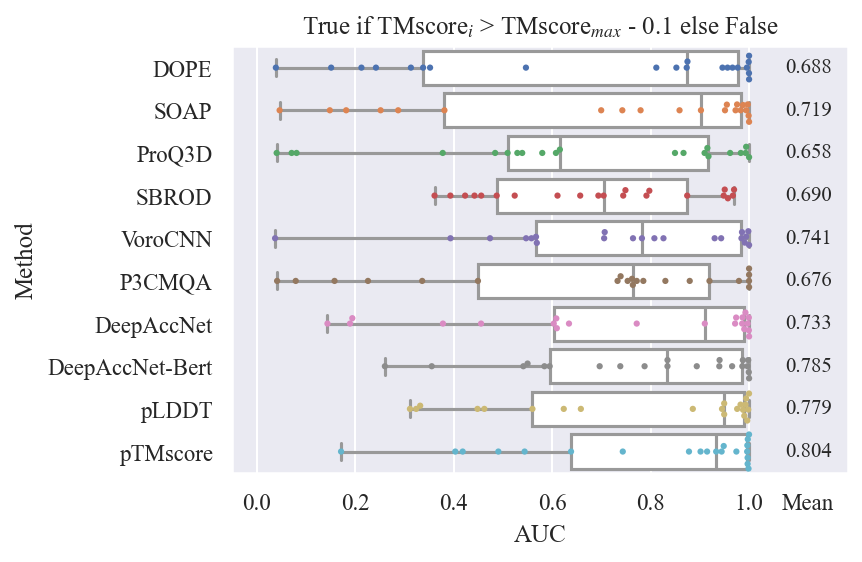

AUC
Method               
DOPE            0.688
DeepAccNet      0.733
DeepAccNet-Bert 0.785
P3CMQA          0.676
ProQ3D          0.658
SBROD           0.690
SOAP            0.719
VoroCNN         0.741
pLDDT           0.779
pTMscore        0.804

TMscore 0.15
True     2085
False     815
Name: TMscore-0.15, dtype: int64
15


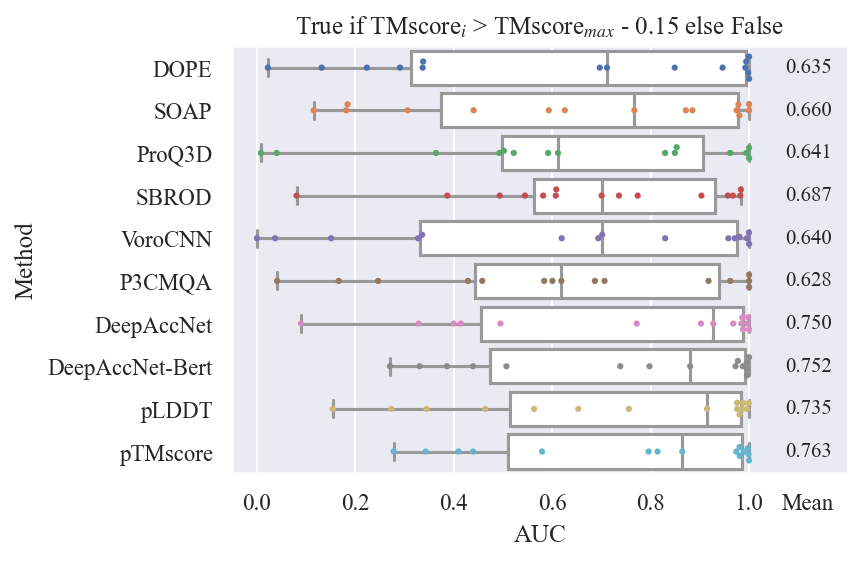

AUC
Method               
DOPE            0.635
DeepAccNet      0.750
DeepAccNet-Bert 0.752
P3CMQA          0.628
ProQ3D          0.641
SBROD           0.687
SOAP            0.660
VoroCNN         0.640
pLDDT           0.735
pTMscore        0.763

TMscore 0.2
True     1559
False     341
Name: TMscore-0.2, dtype: int64
10


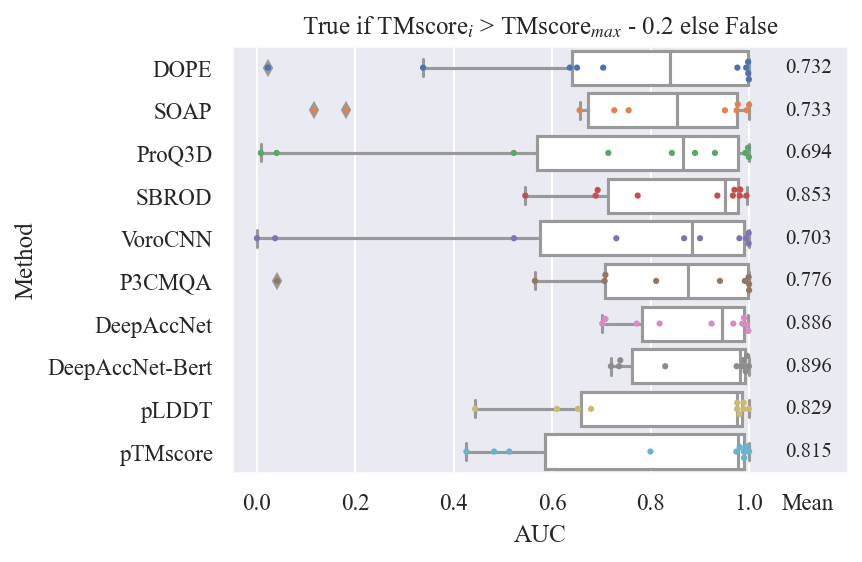

AUC
Method               
DOPE            0.732
DeepAccNet      0.886
DeepAccNet-Bert 0.896
P3CMQA          0.776
ProQ3D          0.694
SBROD           0.853
SOAP            0.733
VoroCNN         0.703
pLDDT           0.829
pTMscore        0.815

In [20]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore']
thresholds = [0.05, 0.1, 0.15, 0.2]
data = df[~df['pTMscore'].isna()]
for label in labels:
    for threshold in thresholds:
        rel_df = data.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
        l = f'{label}-{threshold}'
        print(label, threshold)
        print(rel_df[l].value_counts())
        print(rel_df['Target'].unique().size)
        results = []
        for method in methods:
            aucs = []
            targets = []
            for name, group in rel_df.groupby('Target'):
                if group[method].isna().any():
                    continue
                fpr, tpr, thres = roc_curve(group[l], group[method])
                auc_score = auc(fpr, tpr)
                aucs.append(auc_score)
                targets.append(name)
            if len(aucs) == 0:
                continue
            results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
        cdf = pd.concat(results)
        plt.title(f'True if {label}$_{{i}}$ > {label}$_{{max}}$ - {threshold} else False')
        sns.boxplot(data=cdf, y='Method', x='AUC', color='white')
        sns.swarmplot(data=cdf, y='Method', x='AUC', s=3)
        xticks_max = 1.12
        plt.xlim(-0.05, 1.2)
        xticks = np.append(np.arange(0, 1.2, 0.2), [xticks_max])
        xticks_str = list(map(lambda x: f'{x:.1f}', xticks))
        xticks_str[-1] = 'Mean'
        plt.xticks(xticks, xticks_str)
        plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
        mean_series = cdf.groupby('Method').mean()['AUC']
        for i, method in enumerate(methods):
            if method not in mean_series.index:
                continue
            value = mean_series[method]
            plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
        plt.tight_layout()
        plt.show()
        display(cdf.groupby('Method').mean())

### Targets with low AUC (label: GDT_TS, threshold: 0.05)

In [21]:
# validation
label = 'GDT_TS'
threshold = 0.05
data = df[~df['pTMscore'].isna()]
rel_df = data.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
l = f'{label}-{threshold}'
print(label, threshold)
print(rel_df[l].value_counts())
print(rel_df['Target'].unique().size)
results = []
for method in methods:
    aucs = []
    targets = []
    for name, group in rel_df.groupby('Target'):
        if group[method].isna().any():
            continue
        fpr, tpr, thres = roc_curve(group[l], group[method])
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)
        targets.append(name)
    if len(aucs) == 0:
        continue
    results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
cdf = pd.concat(results)
display(cdf.groupby('Method').mean())

GDT_TS 0.05
True     13213
False     4887
Name: GDT_TS-0.05, dtype: int64
94


AUC
Method               
DOPE            0.646
DeepAccNet      0.684
DeepAccNet-Bert 0.682
P3CMQA          0.583
ProQ3D          0.581
SBROD           0.521
SOAP            0.650
VoroCNN         0.573
pLDDT           0.702
pTMscore        0.685

In [22]:
method= 'pTMscore'
method_auc_df = cdf[cdf['Method'] == method].sort_values('AUC')
target_num = 10
sample_method_auc_df = method_auc_df.head(target_num)
display(sample_method_auc_df)
sample_targets = sample_method_auc_df['Target']

Method   AUC  Target
7   pTMscore 0.020  5ZOE_A
28  pTMscore 0.038  6ILS_A
11  pTMscore 0.065  6CZQ_B
84  pTMscore 0.065  7COH_O
9   pTMscore 0.142  6AWI_A
6   pTMscore 0.165  5Z49_B
88  pTMscore 0.174  7KIH_A
10  pTMscore 0.175  6CFV_A
68  pTMscore 0.186  6WJA_A
70  pTMscore 0.201  6WXD_A

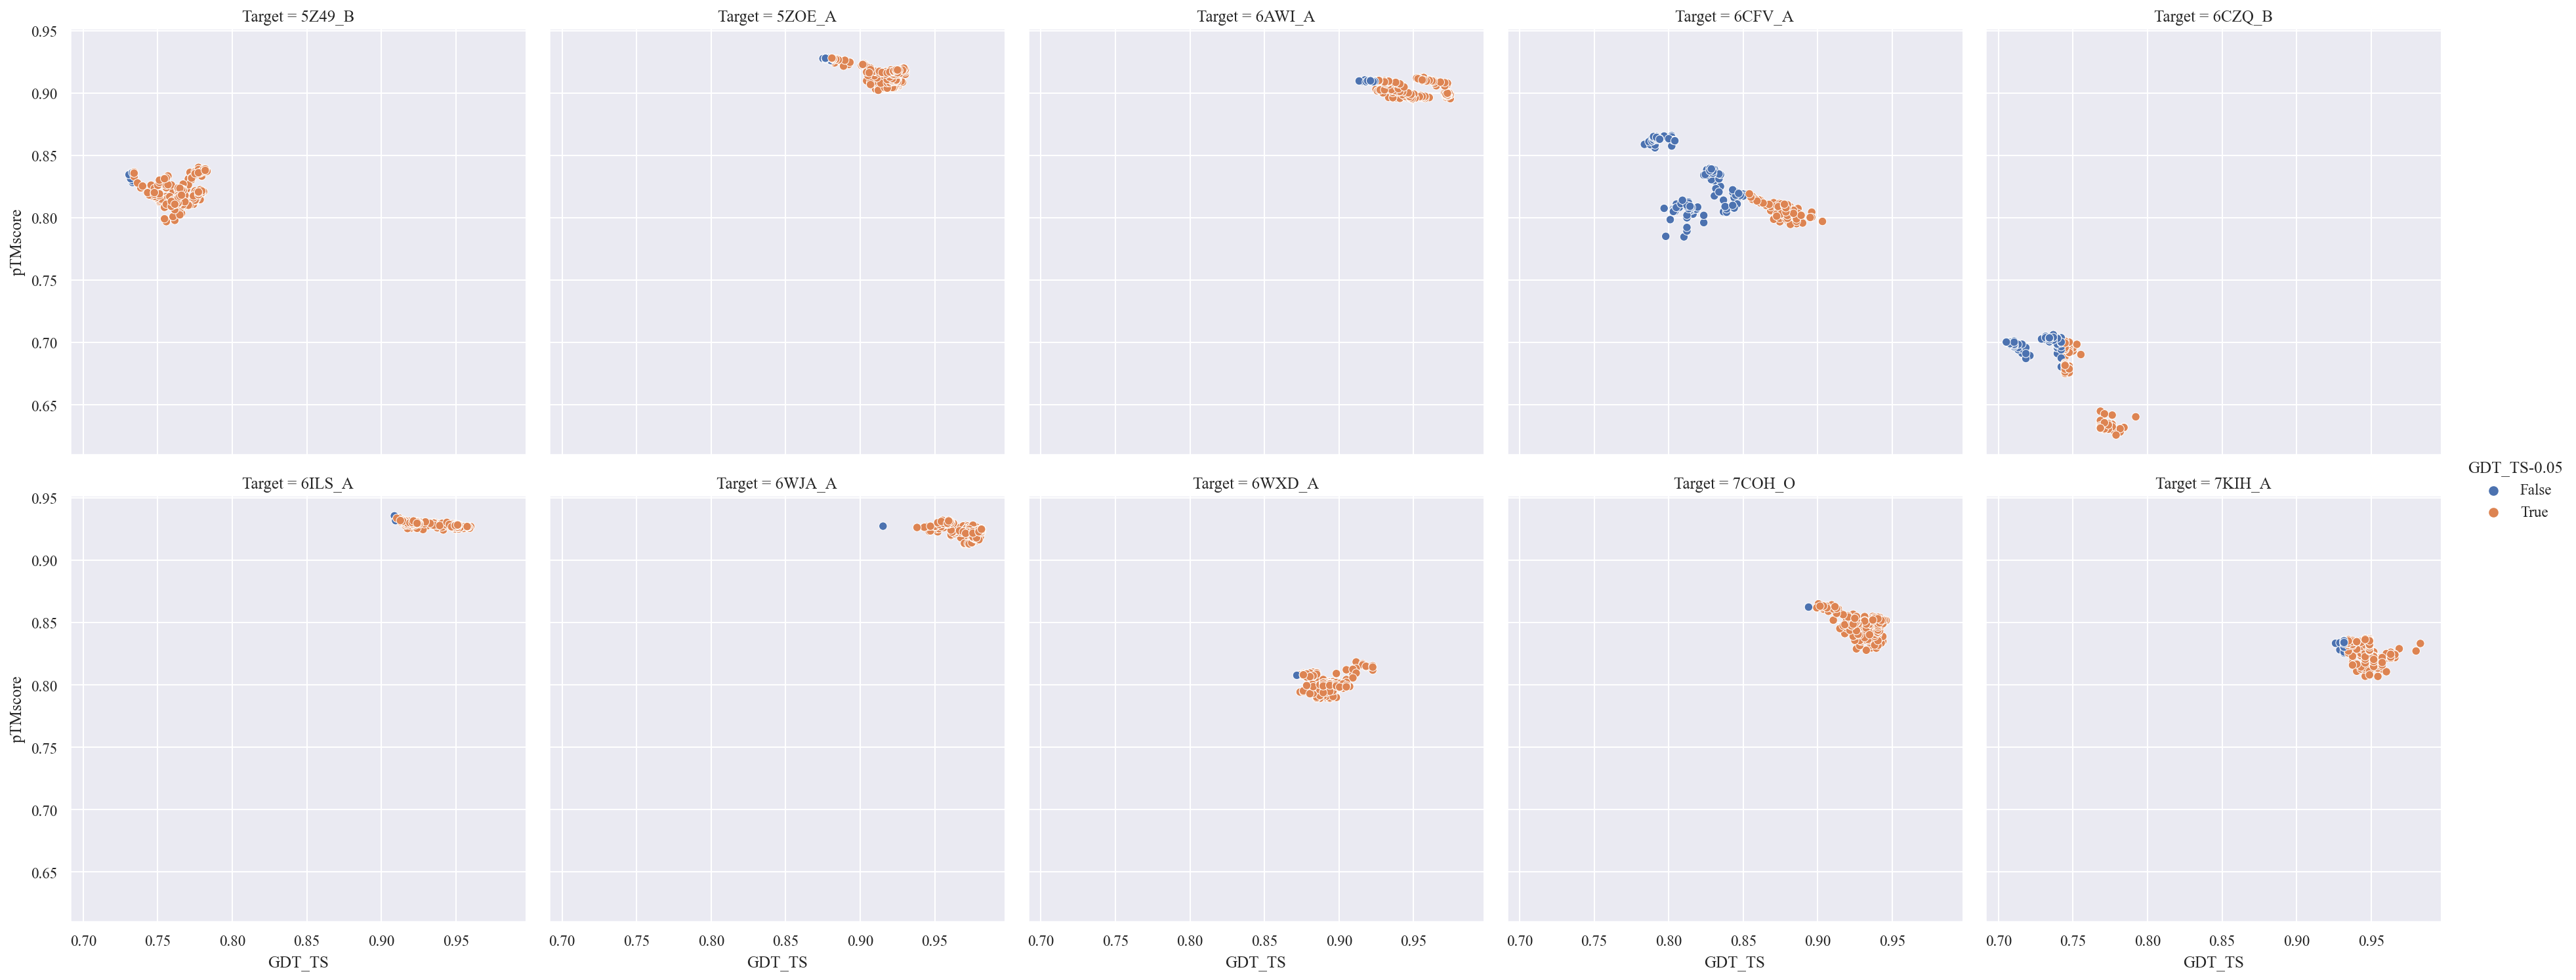

In [23]:
data = rel_df.query('Target in @sample_targets')
sns.relplot(data=data, x=label, y=method, kind='scatter', hue=l, col='Target', col_wrap=5)